Library and Directory Setup

In [1]:
options(warn=-1)

In [2]:
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(plotly))
suppressPackageStartupMessages(library(VennDiagram))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(Cairo))
suppressPackageStartupMessages(library(wesanderson))
suppressPackageStartupMessages(library(ggridges))

In [3]:
setwd("F:/Thesis/Working_Data/Final")
getwd()

[1] "F:/Thesis/Working_Data/Final"

# 0) Input

## 0.1) Industrial-Patent Dataset

In [4]:
Industrial_Patent_Dataset <- fread("Industrial_Patent_Dataset.csv", stringsAsFactors = FALSE, na.strings="")
dim(Industrial_Patent_Dataset)
sapply(Industrial_Patent_Dataset,class)

[1] 19602    54

Patent_number                        Application_Date 
                            "character"                             "character" 
                             Clean_name                    APPLICANT_MATCH_NAME 
                            "character"                             "character" 
                      PDL_ORIGINAL_NAME                          PDL_MATCH_NAME 
                            "character"                             "character" 
                                 METHOD                        Person_ctry_code 
                            "character"                             "character" 
                                COUNTRY                          Applicant_Type 
                            "character"                             "character" 
                           YEAR_FOUNDED                              SIZE_RANGE 
                              "integer"                             "character" 
                               INDUSTRY                               GPT_Scope 
                            "character"                             "character" 
                                   Year                           Applicant_Age 
                              "integer"                               "integer" 
                            Agriculture                     Arts and Humanities 
                              "integer"                               "integer" 
                    Banking and Finance                                Business 
                              "integer"                               "integer" 
                            Cartography                         Computer Vision 
                              "integer"                               "integer" 
                Computing in Government                         Control Methods 
                              "integer"                               "integer" 
    Distributed Artificial Intelligence Document Management and Text Processing 
                              "integer"                               "integer" 
                              Education                       Energy Management 
                              "integer"                               "integer" 
                          Entertainment                             Fuzzy Logic 
                              "integer"                               "integer" 
 Knowledge Representation And Reasoning      Law Social and Behavioral Sciences 
                              "integer"                               "integer" 
              Life and Medical Sciences                       Logic Programming 
                              "integer"                               "integer" 
                       Machine Learning                                Military 
                              "integer"                               "integer" 
            Natural Language Processing                                Networks 
                              "integer"                               "integer" 
                   Ontology Engineering       Personal Devices Computing and Hc 
                              "integer"                               "integer" 
      Physical Sciences and Engineering                 Planning and Scheduling 
                              "integer"                               "integer" 
                   Predictive Analytics                 Probabilistic Reasoning 
                              "integer"                               "integer" 
                             Publishing                                Robotics 
                              "integer"                               "integer" 
                         Search Methods                                Security 
                              "integer"                               "integer" 
                      Speech Processing                      Telecommunications 
                              "integer"                  

In [5]:
Features <- colnames(Industrial_Patent_Dataset)
General_Features <- Features[1:16]
Category_Features <- Features[(length(Features)-2):(length(Features))]
Field_Features <- Features[17:(length(Features)-3)]

General_Features
Category_Features
Field_Features

[1] "Patent_number"        "Application_Date"     "Clean_name"          
 [4] "APPLICANT_MATCH_NAME" "PDL_ORIGINAL_NAME"    "PDL_MATCH_NAME"      
 [7] "METHOD"               "Person_ctry_code"     "COUNTRY"             
[10] "Applicant_Type"       "YEAR_FOUNDED"         "SIZE_RANGE"          
[13] "INDUSTRY"             "GPT_Scope"            "Year"                
[16] "Applicant_Age"

[1] "Field_Applications"      "Functional_Applications"
[3] "Techniques"

[1] "Agriculture"                            
 [2] "Arts and Humanities"                    
 [3] "Banking and Finance"                    
 [4] "Business"                               
 [5] "Cartography"                            
 [6] "Computer Vision"                        
 [7] "Computing in Government"                
 [8] "Control Methods"                        
 [9] "Distributed Artificial Intelligence"    
[10] "Document Management and Text Processing"
[11] "Education"                              
[12] "Energy Management"                      
[13] "Entertainment"                          
[14] "Fuzzy Logic"                            
[15] "Knowledge Representation And Reasoning" 
[16] "Law Social and Behavioral Sciences"     
[17] "Life and Medical Sciences"              
[18] "Logic Programming"                      
[19] "Machine Learning"                       
[20] "Military"                               
[21] "Natural Language Processing"            
[22] "Networks"                               
[23] "Ontology Engineering"                   
[24] "Personal Devices Computing and Hc"      
[25] "Physical Sciences and Engineering"      
[26] "Planning and Scheduling"                
[27] "Predictive Analytics"                   
[28] "Probabilistic Reasoning"                
[29] "Publishing"                             
[30] "Robotics"                               
[31] "Search Methods"                         
[32] "Security"                               
[33] "Speech Processing"                      
[34] "Telecommunications"                     
[35] "Transportation"

In [6]:
Field_Applications <- c("Agriculture","Arts and Humanities","Banking and Finance","Business","Cartography",
                        "Computing in Government","Document Management and Text Processing","Education",
                        "Energy Management","Entertainment",
                        "Law Social and Behavioral Sciences","Life and Medical Sciences", "Military",
                        "Networks","Personal Devices Computing and Hc","Physical Sciences and Engineering",
                        "Publishing","Security","Telecommunications","Transportation")

## 0.2) Enterpreneurial Dataset

In [7]:
Entrepreneurial_Dataset <- fread("Entrepreneurial_Dataset.csv", stringsAsFactors = FALSE, na.strings="")
dim(Entrepreneurial_Dataset)
sapply(Entrepreneurial_Dataset,class)

[1] 12276    13

Cluster                 Field         Justification 
          "character"           "character"           "character" 
Original_Venture_Name       Year_Foundation      Alternative_Name 
          "character"             "integer"           "character" 
           EVENT_TYPE        FUNDING_IN_USD             COUNTRIES 
          "character"             "numeric"           "character" 
YEAR_OF_FUNDING_EVENT            Clean_Name             GPT_Scope 
            "integer"           "character"           "character" 
          Venture_Age 
            "integer"

In [8]:
setorder(Entrepreneurial_Dataset,-Year_Foundation)

# 1) Entrepreneurial Activity

## 1.1) Founding of Startups per Year

In [9]:
Startup_List <-unique(Entrepreneurial_Dataset, by=c("Original_Venture_Name"))
nrow(Startup_List)

[1] 5719

Remove Startups for which the year of foundation is not available

In [10]:
Startup_List <- Startup_List[!is.na(Year_Foundation),]
nrow(Startup_List)

[1] 5719

Count startups per year

In [11]:
GPT_Founding_Yearly <- Startup_List[, .N, by=c("Year_Foundation", "GPT_Scope")]
colnames(GPT_Founding_Yearly)[3] <- "Number_Startups"

#Consistency Check
sum(GPT_Founding_Yearly$Number_Startups)

head(GPT_Founding_Yearly)


[1] 5719

Year_Foundation,GPT_Scope,Number_Startups
2019,Applied_AI,47
2019,Core_AI,10
2019,Other,4
2018,Applied_AI,272
2018,Core_AI,74
2018,Other,18


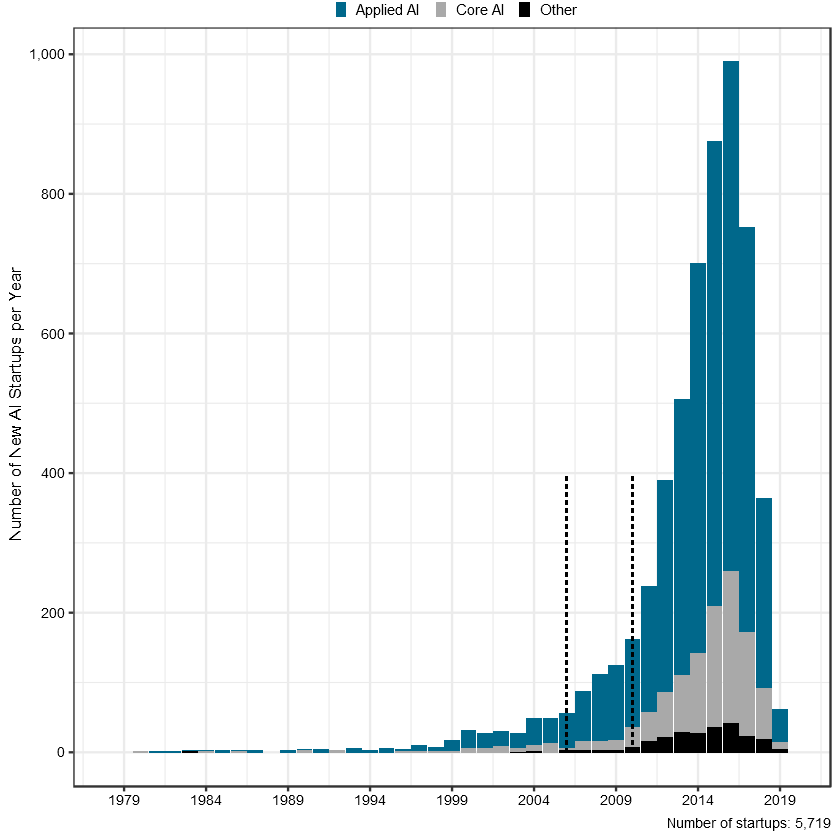

In [12]:
GPT_Yearly_Founding_Trend <- ggplot(GPT_Founding_Yearly, aes(x=Year_Foundation, y=Number_Startups, fill=GPT_Scope)) +
      labs(caption="Number of startups: 5,719") +
      geom_bar(stat="identity") +
      geom_segment(aes(x = 2006, y = 0, xend = 2006, yend =400), linetype="dashed", color="black", size=0.5) + 
      geom_segment(aes(x = 2010, y = 0, xend = 2010, yend =400), linetype="dashed", color="black", size=0.5) + 
      scale_fill_manual(values=c("deepskyblue4", "darkgrey","black"), name = "GPT Scope", 
                        labels = c("Applied AI", "Core AI", "Other")) +
      scale_x_continuous(name=NULL, breaks=seq(1979,2019,5), limits = c(1978,2020)) +
      scale_y_continuous(name="Number of New AI Startups per Year", breaks = seq(0,1000,200),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) +
      theme_bw() +
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-5,-5,-5,-5),legend.key.size=unit("0.25","cm")) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
GPT_Yearly_Founding_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=GPT_Yearly_Founding_Trend,
       filename="GPT_Yearly_Founding_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 1.2) Evolution Enterpreneurial Activity across Application Sectors Overtime

Select only Applied AI Startups

In [14]:
Startups_Development_AS <- Startup_List[GPT_Scope=="Applied_AI",]
nrow(Startups_Development_AS)

[1] 4422

Count starups per Application Sector per year

In [15]:
Startups_Development_AS <- Startups_Development_AS[, .N, by=c("Year_Foundation", "Field")]
colnames(Startups_Development_AS)[3] <- "Number_Startups"

head(Startups_Development_AS)

Year_Foundation,Field,Number_Startups
2019,Agriculture,3
2019,Transportation,2
2019,Banking and Finance,6
2019,Telecommunications,3
2019,Life and Medical Sciences,15
2019,Business,10


In order to rank Fields by the total number of startups a new column will be addedd

In [16]:
Total_startups_Field <- Startup_List[GPT_Scope=="Applied_AI", .N, by=c("Field")]
colnames(Total_startups_Field)[2] <- "Total_Startups_Field"

#Consistency check
sum(Total_startups_Field$Total_Field)

Total_startups_Field

[1] 0

Field,Total_Startups_Field
Agriculture,71
Transportation,325
Banking and Finance,356
Telecommunications,195
Life and Medical Sciences,888
Business,1366
Security,509
Law Social and Behavioral Sciences,87
Entertainment,71
Physical Sciences and Engineering,150


Combine dataset

In [17]:
Startups_Development_AS <- Total_startups_Field[Startups_Development_AS, on="Field"]
head(Startups_Development_AS)

Field,Total_Startups_Field,Year_Foundation,Number_Startups
Agriculture,71,2019,3
Transportation,325,2019,2
Banking and Finance,356,2019,6
Telecommunications,195,2019,3
Life and Medical Sciences,888,2019,15
Business,1366,2019,10


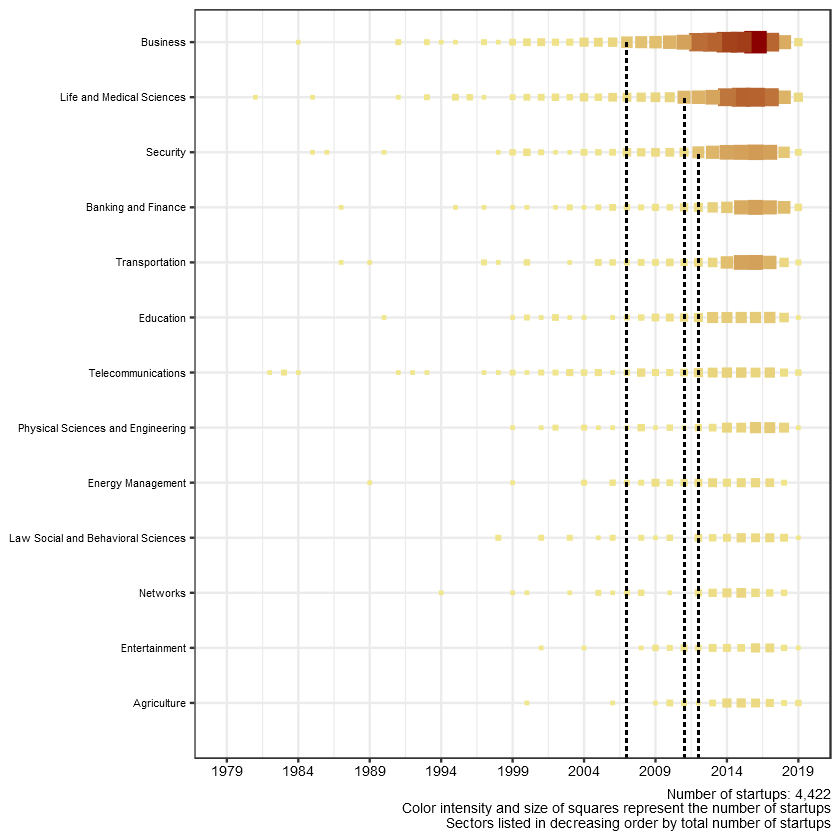

In [18]:
Startups_Development_AS_Chart <- Startups_Development_AS %>%
      mutate(Field=fct_reorder(Field,Total_Startups_Field)) %>%
      ggplot(aes(x= Year_Foundation, y=Field)) +
      geom_point(aes(colour=Number_Startups, size=Number_Startups),shape=15) +
      geom_segment(aes(x = 2007, y = 0, xend = 2007, yend =13), linetype="dashed", color="black", size=0.5) + 
      geom_segment(aes(x = 2011, y = 0, xend = 2011, yend =12), linetype="dashed", color="black", size=0.5) + 
      geom_segment(aes(x = 2012, y = 0, xend = 2012, yend =11), linetype="dashed", color="black", size=0.5) + 
      labs(caption="Number of startups: 4,422\n Color intensity and size of squares represent the number of startups\nSectors listed in decreasing order by total number of startups") +
      theme_bw() +
      theme(legend.position="none") + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black")) + 
      theme(axis.title.y=element_text(size=10)) + 
      scale_y_discrete(name=NULL) +
      scale_x_continuous(name=NULL,limits = c(1978.75,2019.25), breaks=seq(1979,2019,5)) +
      scale_color_gradient(low="khaki", high="darkred")
Startups_Development_AS_Chart

Export graph for Word Document 

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine.
ggsave(plot=Startups_Development_AS_Chart,
       filename="Startups_Development_AS_Chart.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=5,
       height=(5*0.75),
       units=c("in"),
       dpi=300)

## 1.4) Correlation Entrepreneurial and Patent Activity

Count number of starups across Fields

In [32]:
Total_startups_Field

Field,Total_Startups_Field
Agriculture,71
Transportation,325
Banking and Finance,356
Telecommunications,195
Life and Medical Sciences,888
Business,1366
Security,509
Law Social and Behavioral Sciences,87
Entertainment,71
Physical Sciences and Engineering,150


Count number of patent applications across Fields

In [33]:
cols_selection <- c("Patent_number", as.vector(Field_Applications))

Patent_AS <- Industrial_Patent_Dataset[GPT_Scope=="Applied_AI",..cols_selection]
nrow(Patent_AS)

head(Patent_AS)

[1] 18689

Patent_number,Agriculture,Arts and Humanities,Banking and Finance,Business,Cartography,Computing in Government,Document Management and Text Processing,Education,Energy Management,...,Law Social and Behavioral Sciences,Life and Medical Sciences,Military,Networks,Personal Devices Computing and Hc,Physical Sciences and Engineering,Publishing,Security,Telecommunications,Transportation
EP0012777,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
EP0039393,0,1,1,1,0,1,1,0,0,...,0,1,0,0,1,1,0,0,0,0
EP0059929,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
EP0060671,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
EP0091317,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
EP0096712,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Change table structure

In [34]:
Patent_AS <- melt(Patent_AS,
                  id.vars = c("Patent_number"),
                  measure.vars = as.character(Field_Applications),
                  variable.name = "Field",
                  value.name = "Dummy")
head(Patent_AS,10)
tail(Patent_AS,10)

Patent_number,Field,Dummy
EP0012777,Agriculture,0
EP0039393,Agriculture,0
EP0059929,Agriculture,0
EP0060671,Agriculture,0
EP0091317,Agriculture,0
EP0096712,Agriculture,0
EP0097689,Agriculture,0
EP0097820,Agriculture,0
EP0118198,Agriculture,0
EP0119061,Agriculture,0


Patent_number,Field,Dummy
WO2019140863,Transportation,1
WO2019141017,Transportation,0
WO2019141028,Transportation,1
WO2019141042,Transportation,1
WO2019143316,Transportation,1
WO2019143318,Transportation,1
WO2019143318,Transportation,1
WO2019143384,Transportation,1
WO2019143407,Transportation,1
WO2019143435,Transportation,1


In [35]:
Patent_AS <- Patent_AS[Dummy==1,]

#number patents
length(unique(Patent_AS$Patent_number))
       
Patent_AS <- Patent_AS[, .N, by=Field]
colnames(Patent_AS)[2] <- "Number_Patents"

head(Patent_AS,20)

[1] 16184

Field,Number_Patents
Agriculture,730
Arts and Humanities,5806
Banking and Finance,4119
Business,5701
Cartography,2677
Computing in Government,3534
Document Management and Text Processing,4403
Education,1319
Energy Management,642
Entertainment,1713


Combine Tables

In [36]:
Startup_Patent_corr <- Patent_AS[Total_startups_Field, on="Field", nomatch=0]
Startup_Patent_corr

#numer startups
sum(Startup_Patent_corr$Total_Startups_Field)

Field,Number_Patents,Total_Startups_Field
Agriculture,730,71
Transportation,14601,325
Banking and Finance,4119,356
Telecommunications,10919,195
Life and Medical Sciences,15967,888
Business,5701,1366
Security,5103,509
Law Social and Behavioral Sciences,1924,87
Entertainment,1713,71
Physical Sciences and Engineering,14190,150


[1] 4422

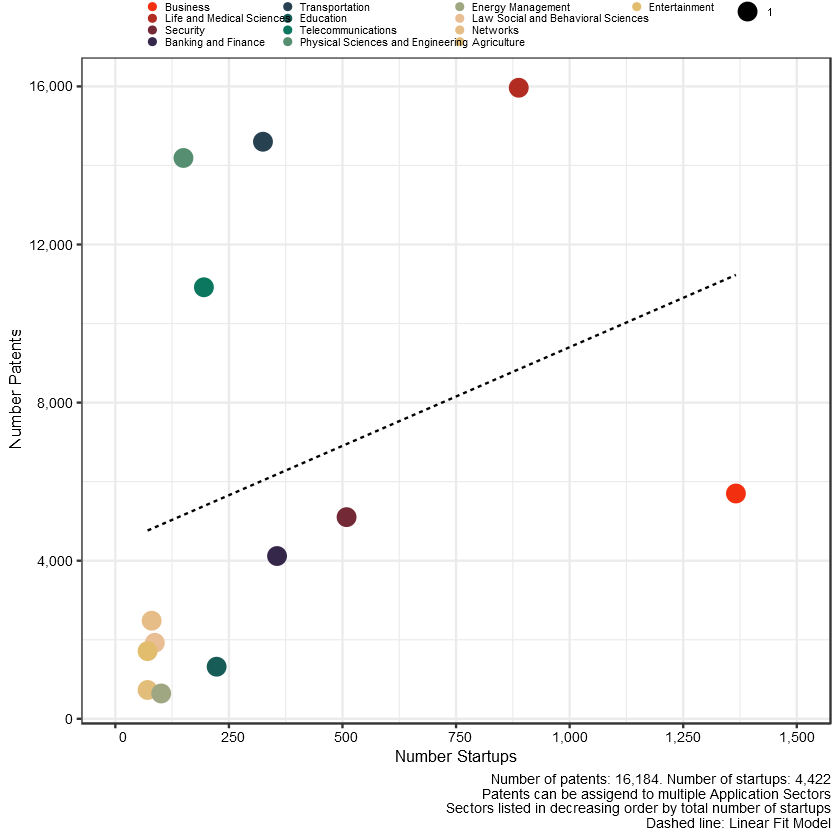

In [37]:
Scatterplot_Startup_Patent_corr <- Startup_Patent_corr %>%
      mutate(Field = fct_reorder(Field, -Total_Startups_Field)) %>%
      ggplot(aes(x=Total_Startups_Field, y=Number_Patents)) + 
      geom_point(aes(color=Field, size=1)) +
      geom_smooth(method="lm" , formula= y ~ x,  color="black", se=FALSE, linetype="dashed", alpha=0.2 ,size=0.5) + 
      labs(caption="Number of patents: 16,184. Number of startups: 4,422\n Patents can be assigend to multiple Application Sectors\nSectors listed in decreasing order by total number of startups\nDashed line: Linear Fit Model") + 
      theme_bw() +
      theme(legend.position="top",legend.title=element_blank(),legend.text = element_text(size=6),
            legend.key = element_rect(size = 1), legend.margin=margin(0,0,0,0),legend.key.size=unit(0.1,"cm"),
            legend.box.margin=margin(-5,-5,-5,-5)) +
      scale_x_continuous(name="Number Startups", breaks=seq(0,1500,250), limits=c(0,1500),
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) +
      scale_y_continuous(name="Number Patents",
                         labels=function(x) format(x, big.mark = ",", decimal.mark = ".", scientific = FALSE)) +
      scale_colour_manual(values=rev(wes_palette(n=13, name="Rushmore", type = "continuous"))) +
      guides(col = guide_legend(ncol = 4)) +
      theme() + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.title.x=element_text(size=10)) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
Scatterplot_Startup_Patent_corr

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Scatterplot_Startup_Patent_corr,
       filename="Scatterplot_Startup_Patent_corr.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=7.25,
       height=(7.25*0.75),
       units=c("in"),
       dpi=300)

# 2) Patenting by Startups

## 2.1) Patenting by Startups

Match Industrial-Patent Dataset with the Entrepreneurial Dataset by Name

In [38]:
setkey(Startup_List, Clean_Name)
setkey(Industrial_Patent_Dataset, APPLICANT_MATCH_NAME)

Startup_Patents <- Startup_List[Industrial_Patent_Dataset, nomatch = 0,
                                         .(Field, Year_Foundation,GPT_Scope, Clean_Name, Patent_number,Application_Date,
                                           APPLICANT_MATCH_NAME, Year)]

head(Startup_Patents)

Field,Year_Foundation,GPT_Scope,Clean_Name,Patent_number,Application_Date,APPLICANT_MATCH_NAME,Year
Machine Learning,2012,Core_AI,ABEJA,WO2019003485,2018-02-05,ABEJA,2018
Machine Learning,2012,Core_AI,ABEJA,WO2019135274,2018-01-04,ABEJA,2018
Life and Medical Sciences,2010,Applied_AI,ADM DIAGNOSTICS,WO2017011746,2016-07-15,ADM DIAGNOSTICS,2016
Life and Medical Sciences,2010,Applied_AI,ADM DIAGNOSTICS,WO2017048904,2016-09-15,ADM DIAGNOSTICS,2016
Physical Sciences and Engineering,2014,Applied_AI,AFERO,WO2017007723,2016-07-01,AFERO,2016
Life and Medical Sciences,2009,Applied_AI,AFFECTIVA,WO2013044183,2012-09-22,AFFECTIVA,2012


In [39]:
#Number Patent Applications
nrow(Startup_Patents)

#Number Startup Applicants
length(unique(Startup_Patents$Clean_Name))

#Share of Startups with Patent Application
length(unique(Startup_Patents$Clean_Name))/nrow(Startup_List)

[1] 615

[1] 266

[1] 0.04651163

### 2.1.1) Startup Patenting across GPT Market Cluster

In [40]:
table(Startup_Patents$GPT_Scope)
prop.table(table(Startup_Patents$GPT_Scope))


Applied_AI    Core_AI      Other 
       452        138         25 


Applied_AI    Core_AI      Other 
0.73495935 0.22439024 0.04065041 

In [41]:
summary(Startup_Patents[GPT_Scope=="Applied_AI",Year])
summary(Startup_Patents[GPT_Scope=="Core_AI",Year])


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1997    2015    2017    2016    2018    2018 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2004    2016    2017    2016    2018    2018 

Patents per year distinguishing between Applied and Core AI

In [42]:
Startup_Patents_GPT <- Startup_Patents[, .N, by=c("Year","GPT_Scope")]
colnames(Startup_Patents_GPT)[3] <- "Number_Patents"
head(Startup_Patents_GPT)

Year,GPT_Scope,Number_Patents
2018,Core_AI,42
2016,Applied_AI,78
2012,Applied_AI,13
2018,Applied_AI,167
2015,Applied_AI,30
2010,Applied_AI,4


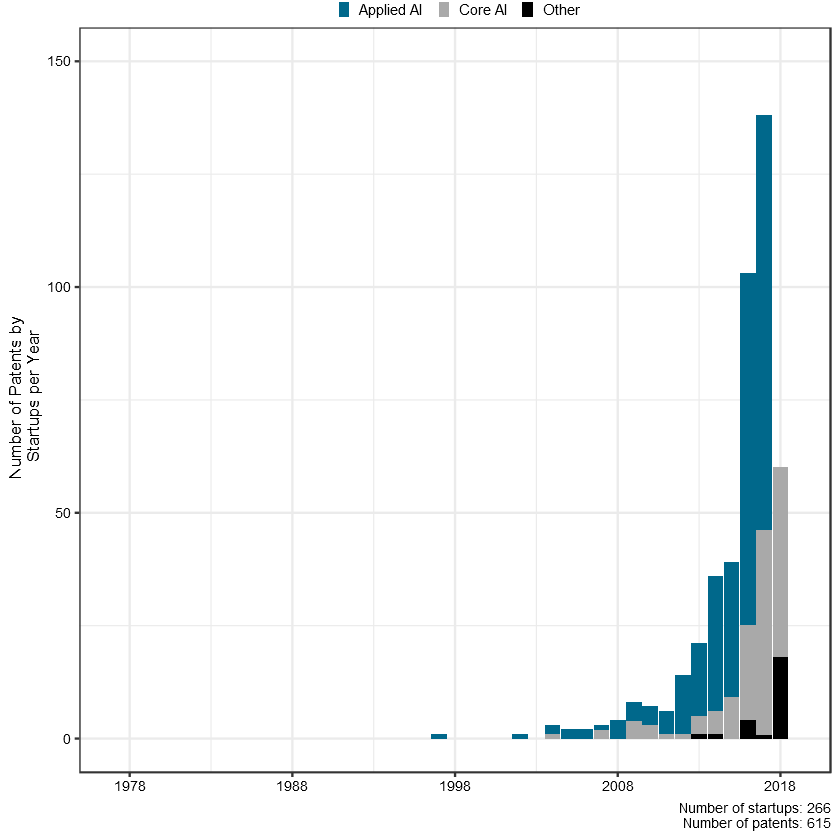

In [43]:
Startup_Patents_GPT_Trend <- ggplot(Startup_Patents_GPT, aes(x = Year, y = Number_Patents, fill=GPT_Scope)) + 
      labs(caption="Number of startups: 266\n Number of patents: 615") +
      geom_bar(stat="identity") + 
      scale_fill_manual(name = "GPT Scope", 
                         values = c("Core_AI" = "darkgrey", "Applied_AI" = "deepskyblue4", "Other"="black"),
                         labels = c("Applied AI", "Core AI", "Other")) +
      scale_y_continuous(name="Number of Patents by\n Startups per Year", limits=c(0,150)) +
      scale_x_continuous(name= NULL, breaks=seq(1978,2018,10), limits = c(1977,2019))+
      theme_bw()+
      theme(legend.position = "top", legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-5,-5,-5,-5),legend.key.size=unit("0.25","cm")) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
Startup_Patents_GPT_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Startup_Patents_GPT_Trend,
       filename="Startup_Patents_GPT_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## 2.2) Patenting by Companies in the Industrial-Patent Dataset Founded Between 2009 and 2018

Select all patent applications where (1) the Applicant is an Enterprise, (2) the year of foundation is available and, (3) select only patent appications from 2009 onwards

In [48]:
Young_Enterprise_Patents <- Industrial_Patent_Dataset[Year>=2009 &
                                             Applicant_Type=="Enterprise" &
                                                is.na(PDL_ORIGINAL_NAME)==FALSE,]
nrow(Young_Enterprise_Patents)
head(Young_Enterprise_Patents)

[1] 7727

Patent_number,Application_Date,Clean_name,APPLICANT_MATCH_NAME,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
WO2018026431,2017-05-30,12 SIGMA TECH,12 SIGMA,12 SIGMA TECHNOLOGIES,12 SIGMA TECHNOLOGIES,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2017179011,2017-04-13,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,1,0,0,1,1,1,1,1,1
WO2019104443,2018-11-30,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2019028261,2018-08-02,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2019104180,2018-11-21,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2017075657,2016-11-03,360 KNEE SYSTEMS PTY LTD,360 KNEE SYSTEMS,360 KNEE SYSTEMS,360 KNEE SYSTEMS,Direct_Match,AUSTRALIA,UNITED STATES,Enterprise,...,1,0,0,1,1,1,1,1,1,1


Create Column to indicate wether the Applicant has been founded Before or After 2009

In [45]:
Young_Enterprise_Patents <- Young_Enterprise_Patents[, Founding_Year_Cluster:= ifelse(YEAR_FOUNDED<2009,"Before","After")]

table(Young_Enterprise_Patents$Founding_Year_Cluster,Young_Enterprise_Patents$GPT_Scope )
round(prop.table(table(Young_Enterprise_Patents$Founding_Year_Cluster)),2)

        
         Applied_AI Core_AI
  After        1844      61
  Before       5544     278


 After Before 
  0.25   0.75 

Count the total number of patent applications per year between 2009 and 2918

In [46]:
Young_Enterprise_Patents_Year <- Young_Enterprise_Patents[, .N, by=c("Year", "GPT_Scope")]
colnames(Young_Enterprise_Patents_Year)[3] <- "Total_Patents_GPT"

head(Young_Enterprise_Patents_Year)

Year,GPT_Scope,Total_Patents_GPT
2017,Applied_AI,1781
2018,Applied_AI,1956
2016,Applied_AI,1166
2012,Applied_AI,269
2015,Applied_AI,720
2013,Applied_AI,352


Count the number of patent applicatiosn by applicants founded after 2009

In [47]:
Young_Enterprise_Patents_After <- Young_Enterprise_Patents[Founding_Year_Cluster=="After",
                                                         .N, by=c("Year", "GPT_Scope")]
colnames(Young_Enterprise_Patents_After)[3] <- "Number_Patents_After" 

head(Young_Enterprise_Patents_After)

Year,GPT_Scope,Number_Patents_After
2017,Applied_AI,506
2018,Applied_AI,626
2016,Applied_AI,350
2013,Applied_AI,43
2012,Applied_AI,27
2015,Applied_AI,182


Combine Tables

In [49]:
setkey(Young_Enterprise_Patents_Year, GPT_Scope, Year)
setkey(Young_Enterprise_Patents_After, GPT_Scope, Year)
Young_Enterprise_Patents_After <- Young_Enterprise_Patents_Year[Young_Enterprise_Patents_After]
head(Young_Enterprise_Patents_After)
tail(Young_Enterprise_Patents_After)

Year,GPT_Scope,Total_Patents_GPT,Number_Patents_After
2009,Applied_AI,225,6
2010,Applied_AI,208,10
2011,Applied_AI,203,10
2012,Applied_AI,269,27
2013,Applied_AI,352,43
2014,Applied_AI,508,84


Year,GPT_Scope,Total_Patents_GPT,Number_Patents_After
2018,Applied_AI,1956,626
2014,Core_AI,15,2
2015,Core_AI,17,5
2016,Core_AI,86,29
2017,Core_AI,85,16
2018,Core_AI,77,9


Calculate the share of patent applications filed by companeis funded after 2009 per year

In [50]:
Young_Enterprise_Patents_After <- Young_Enterprise_Patents_After[, Post_09_Rate := Number_Patents_After/Total_Patents_GPT]
head(Young_Enterprise_Patents_After)
tail(Young_Enterprise_Patents_After)

Year,GPT_Scope,Total_Patents_GPT,Number_Patents_After,Post_09_Rate
2009,Applied_AI,225,6,0.02666667
2010,Applied_AI,208,10,0.04807692
2011,Applied_AI,203,10,0.04926108
2012,Applied_AI,269,27,0.10037175
2013,Applied_AI,352,43,0.12215909
2014,Applied_AI,508,84,0.16535433


Year,GPT_Scope,Total_Patents_GPT,Number_Patents_After,Post_09_Rate
2018,Applied_AI,1956,626,0.3200409
2014,Core_AI,15,2,0.1333333
2015,Core_AI,17,5,0.2941176
2016,Core_AI,86,29,0.3372093
2017,Core_AI,85,16,0.1882353
2018,Core_AI,77,9,0.1168831


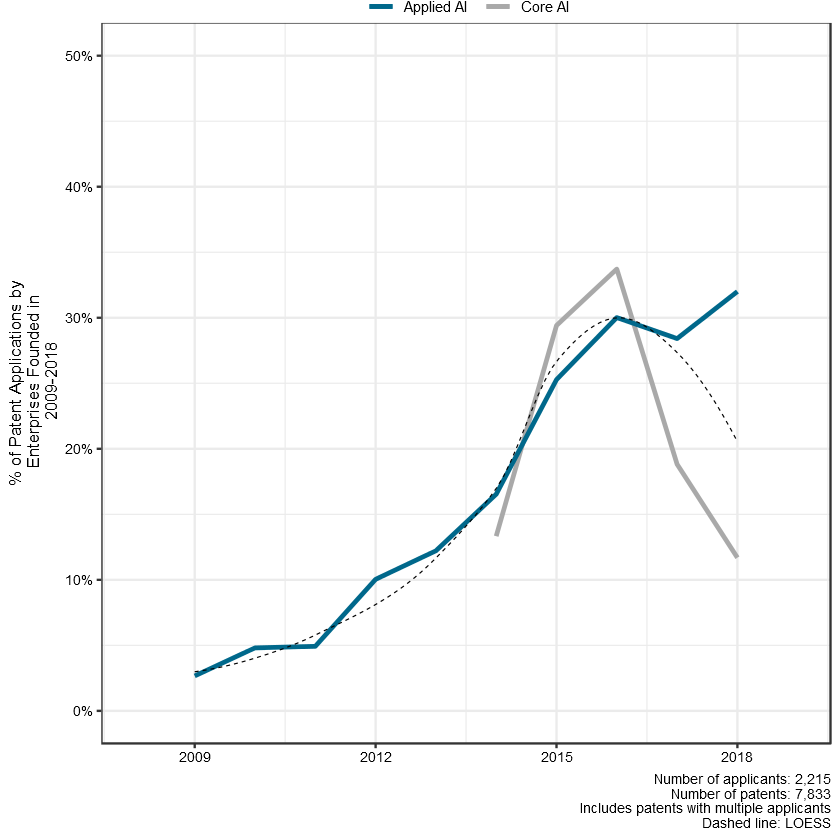

In [69]:
Young_Enterprise_Patents_After_Trend <- ggplot(Young_Enterprise_Patents_After, aes(x = Year, y = Post_09_Rate)) + 
      labs(caption="Number of applicants: 2,215\nNumber of patents: 7,833\n Includes patents with multiple applicants\nDashed line: LOESS") +
      geom_line(aes(color="Core_AI"),Young_Enterprise_Patents_After %>%filter(GPT_Scope=="Core_AI"),size=1) +
      geom_line(aes(color="Applied_AI"),Young_Enterprise_Patents_After %>%filter(GPT_Scope=="Applied_AI"), size=1) +
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.2, color="black", linetype="dashed", size=0.25) + 
      scale_color_manual(name = "GPT Scope", 
                         values = c("Core_AI" = "darkgrey", "Applied_AI" = "deepskyblue4"),
                         labels=c("Applied AI", "Core AI")) +
      scale_y_continuous(name="% of Patent Applications by \nEnterprises Founded in\n 2009-2018",
                         labels = percent_format(accuracy = 5L), limits=c(0,0.5), breaks = seq(0,0.5,0.1)) +
      scale_x_continuous(name=NULL, breaks=seq(2009,2018,3), limits = c(2008,2019))+
            theme_bw()+
      theme(legend.position = "top", legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10))+
      theme(axis.title.y=element_text(size=10)) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
Young_Enterprise_Patents_After_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Young_Enterprise_Patents_After_Trend,
       filename="Young_Enterprise_Patents_After_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

## * Robustness Check: Calculate Share of Patent Applications by Companies founded between 2009 and 2018 Only Direct Match Method

In [52]:
Young_Enterprise_Patents_DirectM <- Industrial_Patent_Dataset[Year>=2009 &
                                             Applicant_Type=="Enterprise" &
                                                is.na(PDL_ORIGINAL_NAME)==FALSE &
                                                      METHOD=="Direct_Match",]

Young_Enterprise_Patents_DirectM <- Young_Enterprise_Patents_DirectM[, Founding_Year_Cluster:= ifelse(YEAR_FOUNDED<2009,
                                                                                                      "Before","After")]

Young_Enterprise_Patents_Year_DirectM  <- Young_Enterprise_Patents_DirectM [, .N, by=c("Year", "GPT_Scope")]
colnames(Young_Enterprise_Patents_Year_DirectM )[3] <- "Total_Patents_GPT"

Young_Enterprise_Patents_After_DirectM <- Young_Enterprise_Patents_DirectM[Founding_Year_Cluster=="After",
                                                         .N, by=c("Year", "GPT_Scope")]
colnames(Young_Enterprise_Patents_After_DirectM)[3] <- "Number_Patents_After" 

setkey(Young_Enterprise_Patents_Year_DirectM, GPT_Scope, Year)
setkey(Young_Enterprise_Patents_After_DirectM, GPT_Scope, Year)
Young_Enterprise_Patents_After_DirectM <- Young_Enterprise_Patents_Year_DirectM[Young_Enterprise_Patents_After_DirectM]

Young_Enterprise_Patents_After_DirectM <- Young_Enterprise_Patents_After_DirectM[,
                                                            Post_09_Rate := Number_Patents_After/Total_Patents_GPT]
nrow(Young_Enterprise_Patents_DirectM)
length(unique(Young_Enterprise_Patents_DirectM$APPLICANT_MATCH_NAME))

head(Young_Enterprise_Patents_After_DirectM)
tail(Young_Enterprise_Patents_After_DirectM)

[1] 4426

[1] 1181

Year,GPT_Scope,Total_Patents_GPT,Number_Patents_After,Post_09_Rate
2010,Applied_AI,115,5,0.04347826
2011,Applied_AI,125,6,0.04800000
2012,Applied_AI,183,25,0.13661202
2013,Applied_AI,240,34,0.14166667
2014,Applied_AI,311,53,0.17041801
2015,Applied_AI,393,77,0.19592875


Year,GPT_Scope,Total_Patents_GPT,Number_Patents_After,Post_09_Rate
2016,Applied_AI,706,167,0.2365439
2017,Applied_AI,979,248,0.2533197
2018,Applied_AI,1072,355,0.3311567
2015,Core_AI,9,2,0.2222222
2016,Core_AI,52,14,0.2692308
2017,Core_AI,40,9,0.2250000


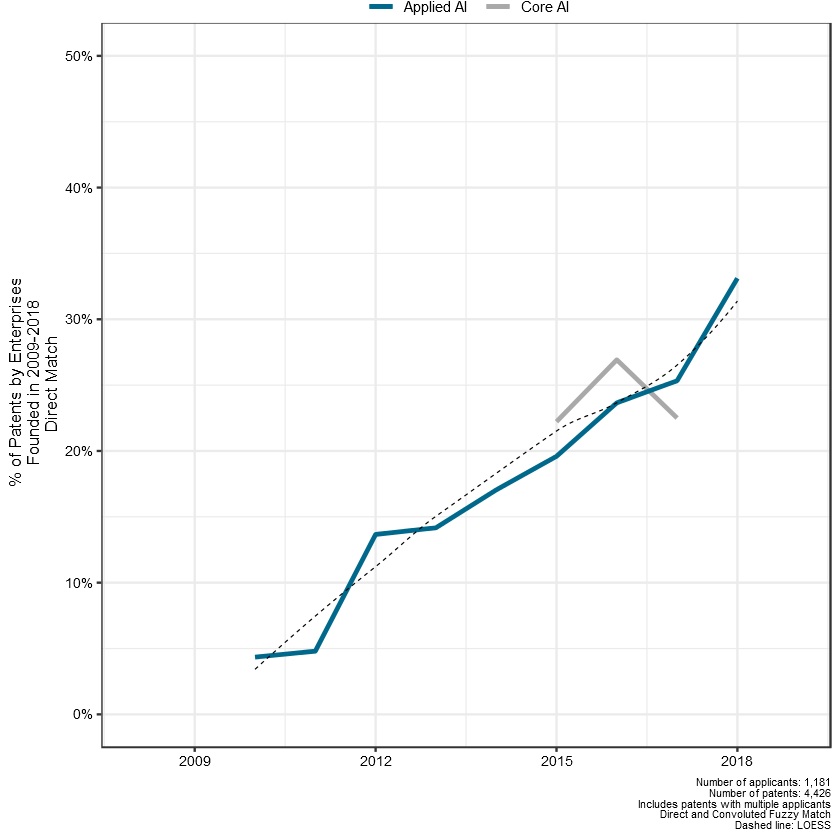

In [53]:
Young_Enterprise_Patents_After_DirectM_Trend <- ggplot(Young_Enterprise_Patents_After_DirectM, aes(x = Year, y = Post_09_Rate)) + 
      geom_line(aes(color="Core_AI"),Young_Enterprise_Patents_After_DirectM %>%filter(GPT_Scope=="Core_AI"),size=1) +
      geom_line(aes(color="Applied_AI"),Young_Enterprise_Patents_After_DirectM %>%filter(GPT_Scope=="Applied_AI"), size=1) +
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.2, color="black", linetype="dashed", size=0.25) + 
      labs(caption="Number of applicants: 1,181\nNumber of patents: 4,426\n Includes patents with multiple applicants\nDirect and Convoluted Fuzzy Match\nDashed line: LOESS") +
      scale_color_manual(name = "GPT Scope", 
                         values = c("Core_AI" = "darkgrey", "Applied_AI" = "deepskyblue4"),
                         labels=c("Applied AI", "Core AI")) +
      scale_y_continuous(name="% of Patents by Enterprises\n Founded in 2009-2018\nDirect Match",
                         labels = percent_format(accuracy = 5L), limits=c(0,0.5), breaks = seq(0,0.5,0.1)) +
      scale_x_continuous(name=NULL, breaks=seq(2009,2018,3), limits = c(2008,2019))+
            theme_bw()+
      theme(legend.position = "top", legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10))+
      theme(axis.title.y=element_text(size=10)) + 
      theme(plot.caption=element_text(family="sans",size=6)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black"))
Young_Enterprise_Patents_After_DirectM_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Young_Enterprise_Patents_After_DirectM_Trend,
       filename="Young_Enterprise_Patents_After_DirectM_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

# 3) Industrial Characteristics of Applicant: Age

In [54]:
summary(Industrial_Patent_Dataset$Applicant_Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    8.00   24.00   40.81   59.00  199.00    9160 

Select Patent Applications filed by Enterprises for which the age is available and is postive

In [55]:
Applicant_Age <- Industrial_Patent_Dataset[Applicant_Age>-1 & Applicant_Type=="Enterprise",]

#Nunber Applications
length(unique(Applicant_Age$Patent_number))

nrow(Applicant_Age)
#Number unique Applicants
length(unique(Applicant_Age$APPLICANT_MATCH_NAME))

[1] 10037

[1] 10442

[1] 2862

Distribution statistics for Applied and Core AI

## 3.1) Age Distribution

### 3.1.1) Applicant Age Distribution across GPT Market Cluster

In [56]:
summary(Applicant_Age[GPT_Scope=="Core_AI",Applicant_Age])
summary(Applicant_Age[GPT_Scope=="Applied_AI",Applicant_Age])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   30.00   53.66   95.00  170.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   23.00   40.21   57.00  199.00 

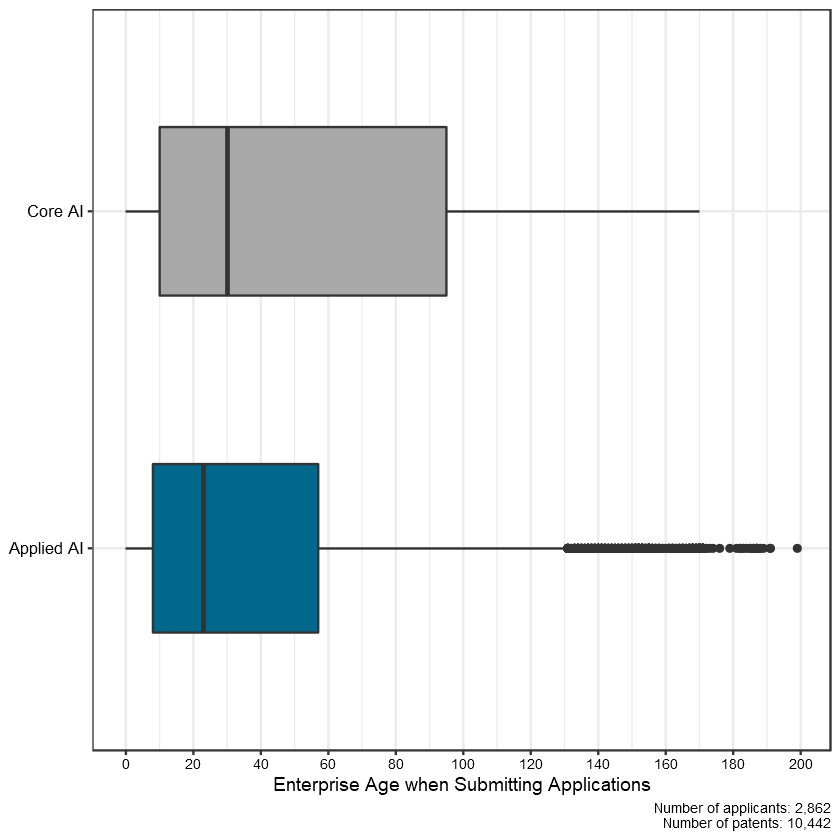

In [57]:
Boxplot_Age_GPT<- ggplot(Applicant_Age, aes(x=GPT_Scope, y=Applicant_Age, fill=GPT_Scope)) + 
      geom_boxplot(width=0.5) +
      labs(caption="Number of applicants: 2,862\n Number of patents: 10,442") +
      theme_bw() + 
      theme(legend.position="none",legend.title=element_blank(),legend.text = element_text(size=6),
            legend.key = element_rect(size = 1)) + 
      scale_x_discrete(name=NULL,labels=c("Applied AI","Core AI")) + 
      scale_y_continuous(name="Enterprise Age when Submitting Applications", breaks=seq(0,200,20)) + 
      scale_fill_manual(values=c("deepskyblue4","darkgrey")) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=10, color="black")) +
      theme(axis.title.y=element_text(size=10)) + 
      coord_flip()
Boxplot_Age_GPT

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Boxplot_Age_GPT,
       filename="Boxplot_Age_GPT.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

### 3.1.2) Applicant Age Distribution across Application Sectors

Select Applied AI patent applications drom Median_Applicant_Age

In [58]:
Applicant_Age_AS <- Applicant_Age[GPT_Scope=="Applied_AI",]

#Nunber Applications
length(unique(Applicant_Age_AS$Patent_number))
#Number unique Applicants
length(unique(Applicant_Age_AS$APPLICANT_MATCH_NAME))

head(Applicant_Age_AS)

[1] 9583

[1] 2820

Patent_number,Application_Date,Clean_name,APPLICANT_MATCH_NAME,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
WO2018026431,2017-05-30,12 SIGMA TECH,12 SIGMA,12 SIGMA TECHNOLOGIES,12 SIGMA TECHNOLOGIES,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2017179011,2017-04-13,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,1,0,0,1,1,1,1,1,1
WO2019104443,2018-11-30,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2008060643,2007-03-21,21ST CENTURY TECH INC,21ST CENTURY,21ST SENSORY,21ST SENSORY,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,1,1,1,1,1
WO2019028261,2018-08-02,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2019104180,2018-11-21,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1


Transform table for graph

Summarize Age by Field by Year

In [59]:
cols_selction <- c("Patent_number", "Year", "Applicant_Age", as.vector(Field_Applications))
Applicant_Age_AS <- Applicant_Age_AS[, ..cols_selction]

head(Applicant_Age_AS)

Patent_number,Year,Applicant_Age,Agriculture,Arts and Humanities,Banking and Finance,Business,Cartography,Computing in Government,Document Management and Text Processing,...,Law Social and Behavioral Sciences,Life and Medical Sciences,Military,Networks,Personal Devices Computing and Hc,Physical Sciences and Engineering,Publishing,Security,Telecommunications,Transportation
WO2018026431,2017,2,0,1,0,1,0,0,1,...,0,1,0,0,1,1,1,0,1,1
WO2017179011,2017,5,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,1
WO2019104443,2018,6,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,1
WO2008060643,2007,13,0,0,0,0,0,1,0,...,0,1,1,1,1,1,0,0,1,1
WO2019028261,2018,3,0,0,1,1,0,0,0,...,0,1,0,0,1,1,1,0,1,1
WO2019104180,2018,3,0,0,1,0,0,0,0,...,1,1,0,0,1,1,1,0,1,1


In [60]:
Applicant_Age_AS <- melt(Applicant_Age_AS,
                  id.vars=c("Year", "Patent_number","Applicant_Age"),
                  measure.vars = as.character(Field_Applications),
                  variable.name = "Field",
                  value.name = "Dummy")

head(Applicant_Age_AS)

Year,Patent_number,Applicant_Age,Field,Dummy
2017,WO2018026431,2,Agriculture,0
2017,WO2017179011,5,Agriculture,0
2018,WO2019104443,6,Agriculture,0
2007,WO2008060643,13,Agriculture,0
2018,WO2019028261,3,Agriculture,0
2018,WO2019104180,3,Agriculture,0


In [61]:
Applicant_Age_AS <- Applicant_Age_AS[Dummy==1,]

head(Applicant_Age_AS)

Year,Patent_number,Applicant_Age,Field,Dummy
2017,WO2017131975,2,Agriculture,1
2012,WO2013059938,18,Agriculture,1
2012,WO2012155192,39,Agriculture,1
2001,EP2631856,1,Agriculture,1
2005,WO2005116896,5,Agriculture,1
1994,EP0615682,29,Agriculture,1


In order to order Fields in the graph, count number of applications by Field

In [62]:
Applicant_Age_AS_Field <- Applicant_Age_AS[, .N, by=Field]
colnames(Applicant_Age_AS_Field)[2] <- "Total_Field"

head(Applicant_Age_AS_Field)

Field,Total_Field
Agriculture,321
Arts and Humanities,3460
Banking and Finance,2177
Business,3261
Cartography,1623
Computing in Government,1834


Combine Tables

In [63]:
Applicant_Age_AS <- Applicant_Age_AS_Field[Applicant_Age_AS, on="Field"]
head(Applicant_Age_AS)

Field,Total_Field,Year,Patent_number,Applicant_Age,Dummy
Agriculture,321,2017,WO2017131975,2,1
Agriculture,321,2012,WO2013059938,18,1
Agriculture,321,2012,WO2012155192,39,1
Agriculture,321,2001,EP2631856,1,1
Agriculture,321,2005,WO2005116896,5,1
Agriculture,321,1994,EP0615682,29,1


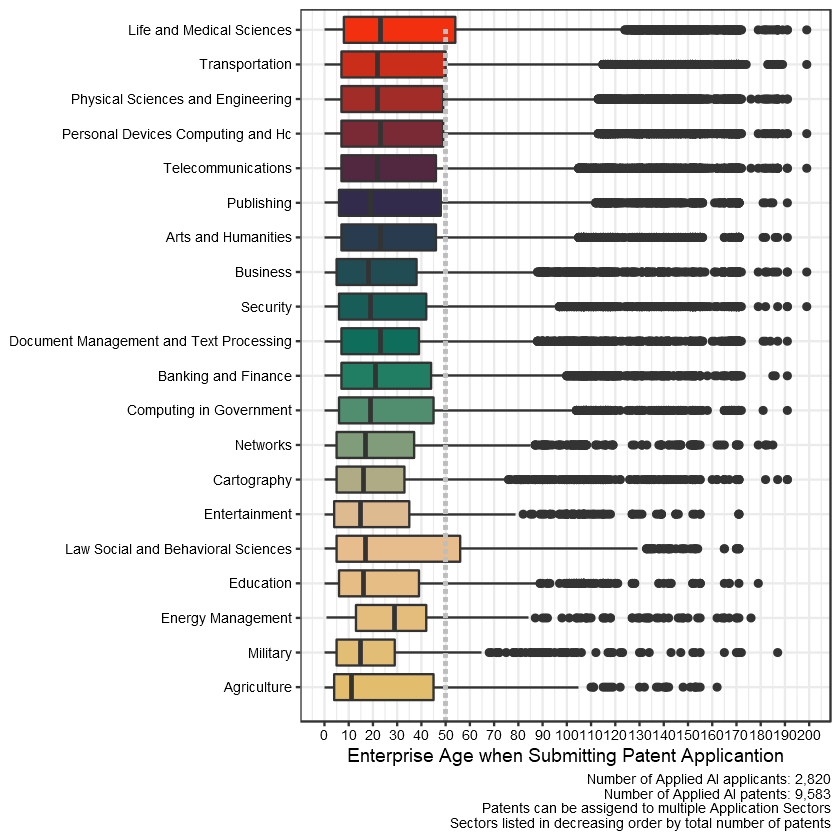

In [64]:
Boxplot_Age_AS<- Applicant_Age_AS %>%
      mutate(Field =fct_reorder(Field,Total_Field)) %>%
      ggplot(aes(x=Field, y=Applicant_Age, fill=Field)) + 
      geom_boxplot() +
      labs(caption="Number of Applied AI applicants: 2,820\nNumber of Applied AI patents: 9,583\nPatents can be assigend to multiple Application Sectors\nSectors listed in decreasing order by total number of patents") +
      geom_segment(aes(x=0, xend=20, y=50, yend=50), linetype="dashed", color="grey", size=0.75) + 
      theme_bw() + 
      theme(legend.position="none",legend.title=element_blank(),legend.text = element_text(size=6),
            legend.key = element_rect(size = 1)) + 
      guides(col = guide_legend(ncol = 4)) +
      scale_x_discrete(name=NULL) + 
      scale_y_continuous(name="Enterprise Age when Submitting Patent Applicantion", breaks=seq(0,200,10)) + 
      scale_fill_manual(values=wes_palette(n=20, name="Rushmore", type = "continuous")) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      theme(axis.title.y=element_text(size=10)) + 
      coord_flip()
Boxplot_Age_AS

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Boxplot_Age_AS,
       filename="Boxplot_Age_AS.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=7.25,
       height=(7.25*0.75),
       units=c("in"),
       dpi=300)

## 3.2) Evolution of Applicant Age Over Time

### 3.2.1) Applicant Median Age

Select Patent Applications filed by Enterprises for which the age is available and is postive

In [65]:
Median_Applicant_Age <- Industrial_Patent_Dataset[Applicant_Age>-1 & Applicant_Type=="Enterprise",]

length(unique(Median_Applicant_Age$Patent_number))
nrow(Median_Applicant_Age)
length(unique(Median_Applicant_Age$APPLICANT_MATCH_NAME))

[1] 10037

[1] 10442

[1] 2862

Calculate Median Age per Year per GTP Scope

In [66]:
Median_Applicant_Age <- Median_Applicant_Age[, keyby=.(GPT_Scope, Year),
                                             .(Median_Age = median(Applicant_Age))]
setorder(Median_Applicant_Age,Year)
head(Median_Applicant_Age)

GPT_Scope,Year,Median_Age
Applied_AI,1981,70.0
Applied_AI,1982,90.0
Applied_AI,1983,90.0
Applied_AI,1984,24.0
Applied_AI,1985,39.0
Applied_AI,1986,66.5


In [67]:
summary(Median_Applicant_Age[GPT_Scope=="Core_AI",Median_Age])
summary(Median_Applicant_Age[GPT_Scope=="Applied_AI",Median_Age])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   26.00   52.25   60.10   89.75  148.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   24.00   31.25   46.25   74.50   90.00 

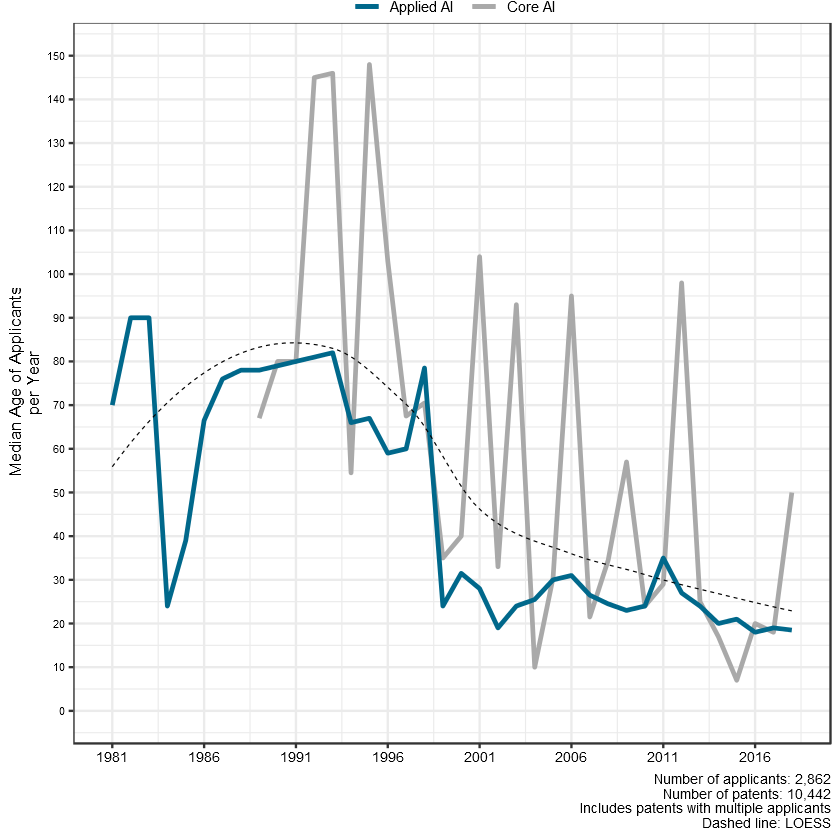

In [68]:
Median_Applicant_Age_Trend <- ggplot(Median_Applicant_Age, aes(x = Year, y = Median_Age)) + 
      labs(caption="Number of applicants: 2,862\nNumber of patents: 10,442\n Includes patents with multiple applicants\n Dashed line: LOESS") +
      geom_line(aes(color="Core_AI"),Median_Applicant_Age %>%filter(GPT_Scope=="Core_AI"),size=1) +
      geom_line(aes(color="Applied_AI"),Median_Applicant_Age %>%filter(GPT_Scope=="Applied_AI"),size=1) +
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.2, color="black", linetype="dashed", size=0.25) + 
      scale_color_manual(name = "GPT Scope", values = c("Core_AI" = "darkgrey", "Applied_AI" = "deepskyblue4"),
                         labels=c("Applied AI", "Core AI")) +
      theme_bw()+
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10)) +
      scale_y_continuous(name="Median Age of Applicants\nper Year", breaks=seq(0,150,10), limits = c(0,150)) +
      scale_x_continuous(name= NULL, breaks=seq(1981,2018,5), limits = c(1980.75,2018.25)) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black"))
Median_Applicant_Age_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Median_Applicant_Age_Trend,
       filename="Median_Applicant_Age_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

### 3.2.2) New Applicant Median Age

Select Patent Applications filed by Enterprises for which the age is available and is postive

In [70]:
New_Applicant_Age <- Industrial_Patent_Dataset[Applicant_Age>-1 & 
                                                Applicant_Type=="Enterprise" &
                                                is.na(YEAR_FOUNDED)==FALSE,]

length(unique(New_Applicant_Age$APPLICANT_MATCH_NAME))
nrow(New_Applicant_Age)
length(unique(New_Applicant_Age$Patent_number))

[1] 2862

[1] 10442

[1] 10037

Identify the first patent application per Applicant

In [71]:
setorder(New_Applicant_Age,Year)
New_Applicant_Age <- New_Applicant_Age[, .SD[1], by = APPLICANT_MATCH_NAME]

#Consistency Check
nrow(New_Applicant_Age)
head(New_Applicant_Age)

[1] 2862

APPLICANT_MATCH_NAME,Patent_number,Application_Date,Clean_name,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
IBM,EP0039393,1981-03-06,IBM CORP,IBM,IBM,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,0,0,1,1,1
EASTMAN KODAK,EP0097689,1982-12-01,EASTMAN KODAK CO,EASTMAN KODAK,EASTMAN KODAK,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,0,0,1,0,1
NCR,EP0096712,1982-12-07,NCR CORP,NCR CORPORATION,NCR,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,1,0,0,1,1,1
UBE IND,EP0060671,1982-03-09,UBE IND LTD,"UBE INDUSTRIES, LTD.",UBE INDUSTRIES,Fuzzy_Match,JAPAN,JAPAN,Enterprise,...,0,0,0,0,0,0,0,1,0,0
TOSHIBA,EP0091317,1983-04-06,CO LTD TOSHIBA,TOSHIBA CORPORATION,TOSHIBA,Direct_Match,JAPAN,JAPAN,Enterprise,...,0,0,0,0,0,0,0,1,1,0
CAMBRIDGE LIFE SCIENCES,EP0121385,1984-03-23,CAMBRIDGE LIFE SCIENCES PLC,CAMBRIDGE BIOSCIENCE LTD,CAMBRIDGE BIOSCIENCE,Fuzzy_Match,UNITED KINGDOM,UNITED KINGDOM,Enterprise,...,0,0,0,0,0,0,0,1,1,0


Calculate the Yearly median between Applied and Core AI

In [72]:
New_Applicant_Age <- New_Applicant_Age[,keyby=.(GPT_Scope, Year),
                                             .(Yearly_Median=median(Applicant_Age))]
head(New_Applicant_Age)

GPT_Scope,Year,Yearly_Median
Applied_AI,1981,70.0
Applied_AI,1982,90.0
Applied_AI,1983,108.0
Applied_AI,1984,28.0
Applied_AI,1985,35.5
Applied_AI,1986,32.0


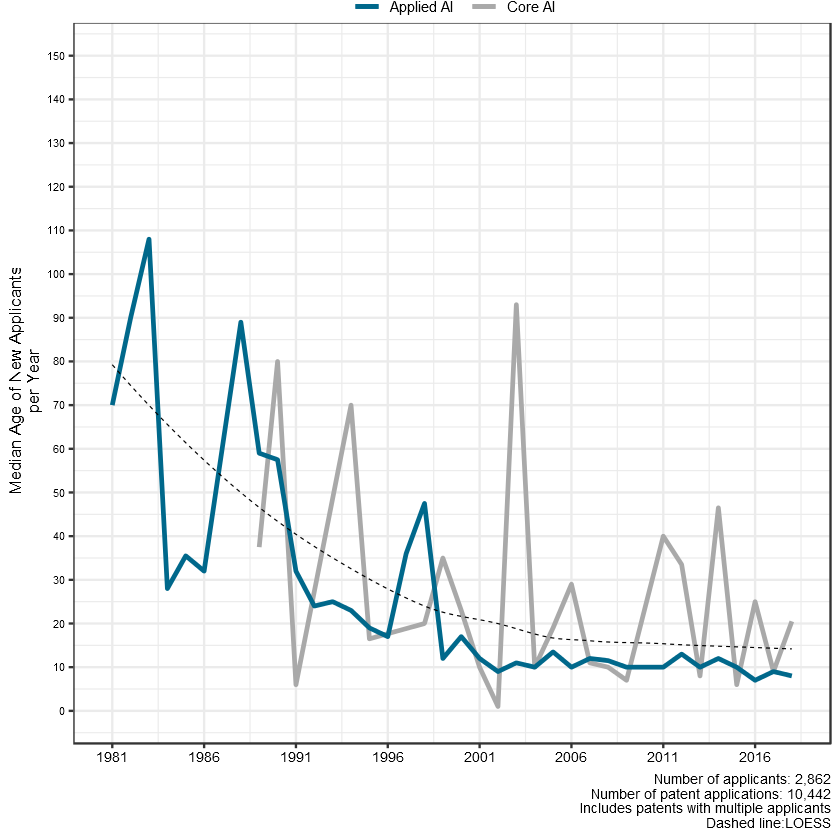

In [73]:
New_Applicant_Age_Trend <- ggplot(New_Applicant_Age, aes(x = Year, y = Yearly_Median)) + 
      labs(caption="Number of applicants: 2,862\nNumber of patent applications: 10,442\n Includes patents with multiple applicants\nDashed line:LOESS") +
      geom_line(aes(color="Core_AI"),New_Applicant_Age %>%filter(GPT_Scope=="Core_AI"),size=1) +
      geom_line(aes(color="Applied_AI"),New_Applicant_Age %>%filter(GPT_Scope=="Applied_AI"),size=1) +
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.2, color="black", linetype="dashed", size=0.25) + 
      scale_color_manual(name = "GPT Scope", values = c("Core_AI" = "darkgrey", "Applied_AI" = "deepskyblue4"),
                         labels=c("Applied AI", "Core AI")) +
      theme_bw()+
      theme(legend.position = "top",legend.title=element_blank(),legend.margin=margin(0,0,0,0),
            legend.box.margin=margin(-10,-10,-10,-10)) +
      scale_y_continuous(name="Median Age of New Applicants\n per Year", breaks=seq(0,150,10), limits = c(0,150)) +
      scale_x_continuous(name= NULL, breaks=seq(1981,2018,5), limits = c(1980.75,2018.25)) +
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black"))
New_Applicant_Age_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=New_Applicant_Age_Trend,
       filename="New_Applicant_Age_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=3.54,
       height=(3.54*0.75),
       units=c("in"),
       dpi=300)

### 3.3.3) New Applicant Median Age across Application Sectors 

Select  all Applied AI Patent Applications filed by Enterprises for which the age is available and is postive

In [74]:
New_Applicant_Age_AS <- Industrial_Patent_Dataset[Applicant_Age>-1 &
                                                      Applicant_Type=="Enterprise" &
                                                      is.na(PDL_ORIGINAL_NAME)==FALSE &
                                                      GPT_Scope=="Applied_AI",]
#Number Applicants
length(unique(New_Applicant_Age_AS$APPLICANT_MATCH_NAME))

#Number Applications
length(unique(New_Applicant_Age_AS$Patent_number))

[1] 2820

[1] 9583

Identify the first patent application per Applicant

In [75]:
setorder(New_Applicant_Age_AS,Year)
New_Applicant_Age_AS <- New_Applicant_Age_AS[, .SD[1], by = APPLICANT_MATCH_NAME]

#Consistency Check
nrow(New_Applicant_Age_AS)

head(New_Applicant_Age_AS)

[1] 2820

APPLICANT_MATCH_NAME,Patent_number,Application_Date,Clean_name,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
IBM,EP0039393,1981-03-06,IBM CORP,IBM,IBM,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,0,0,1,1,1
EASTMAN KODAK,EP0097689,1982-12-01,EASTMAN KODAK CO,EASTMAN KODAK,EASTMAN KODAK,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,0,0,1,0,1
NCR,EP0096712,1982-12-07,NCR CORP,NCR CORPORATION,NCR,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,1,0,0,1,1,1
UBE IND,EP0060671,1982-03-09,UBE IND LTD,"UBE INDUSTRIES, LTD.",UBE INDUSTRIES,Fuzzy_Match,JAPAN,JAPAN,Enterprise,...,0,0,0,0,0,0,0,1,0,0
TOSHIBA,EP0091317,1983-04-06,CO LTD TOSHIBA,TOSHIBA CORPORATION,TOSHIBA,Direct_Match,JAPAN,JAPAN,Enterprise,...,0,0,0,0,0,0,0,1,1,0
CAMBRIDGE LIFE SCIENCES,EP0121385,1984-03-23,CAMBRIDGE LIFE SCIENCES PLC,CAMBRIDGE BIOSCIENCE LTD,CAMBRIDGE BIOSCIENCE,Fuzzy_Match,UNITED KINGDOM,UNITED KINGDOM,Enterprise,...,0,0,0,0,0,0,0,1,1,0


Transform Table for Graph

In [76]:
cols_selction <- c("Patent_number", "Year", "Applicant_Age", as.vector(Field_Applications))
New_Applicant_Age_AS <- New_Applicant_Age_AS[, ..cols_selction]

New_Applicant_Age_AS <- melt(New_Applicant_Age_AS,
                                id.vars=c("Year", "Patent_number","Applicant_Age"),
                                measure.vars = as.character(Field_Applications),
                                variable.name = "Field",
                                value.name = "Dummy")

head(New_Applicant_Age_AS)

Year,Patent_number,Applicant_Age,Field,Dummy
1981,EP0039393,70,Agriculture,0
1982,EP0097689,90,Agriculture,0
1982,EP0096712,98,Agriculture,0
1982,EP0060671,85,Agriculture,0
1983,EP0091317,108,Agriculture,0
1984,EP0121385,0,Agriculture,0


In [77]:
New_Applicant_Age_AS <- New_Applicant_Age_AS[Dummy==1,]

head(New_Applicant_Age_AS)

Year,Patent_number,Applicant_Age,Field,Dummy
1994,EP0615682,29,Agriculture,1
1994,EP0629996,9,Agriculture,1
1995,WO1995024637,0,Agriculture,1
1995,WO1996013790,19,Agriculture,1
1996,EP0847563,10,Agriculture,1
1996,WO1997009678,46,Agriculture,1


In order to select the order of Fields in the graph, count applications by Field in a new table

In [78]:
Median_New_Applicant_Age_AS_Field <- New_Applicant_Age_AS[, by = Field,
                                                         .(Field_Median = median(Applicant_Age),
                                                           Total_Field_Patens=sum(Dummy))]

head(Median_New_Applicant_Age_AS_Field)

Field,Field_Median,Total_Field_Patens
Agriculture,9,156
Arts and Humanities,9,941
Banking and Finance,9,745
Business,8,1023
Cartography,7,562
Computing in Government,9,662


Count by 'New_Applicant_Age_AS' by Field and Year

In [79]:
New_Applicant_Age_AS <- New_Applicant_Age_AS[, keyby=.(Field, Year),
                                                   .(Yearly_Median=median(Applicant_Age))]

head(New_Applicant_Age_AS)

Field,Year,Yearly_Median
Agriculture,1994,19.0
Agriculture,1995,9.5
Agriculture,1996,28.0
Agriculture,1998,43.5
Agriculture,1999,20.0
Agriculture,2000,6.5


Merge 'New_Applicant_Age_AS' table with 'Median_New_Applicant_Age_AS_Field'

In [80]:
New_Applicant_Age_AS <- Median_New_Applicant_Age_AS_Field[New_Applicant_Age_AS, on="Field"]
head(New_Applicant_Age_AS)

Field,Field_Median,Total_Field_Patens,Year,Yearly_Median
Agriculture,9,156,1994,19.0
Agriculture,9,156,1995,9.5
Agriculture,9,156,1996,28.0
Agriculture,9,156,1998,43.5
Agriculture,9,156,1999,20.0
Agriculture,9,156,2000,6.5


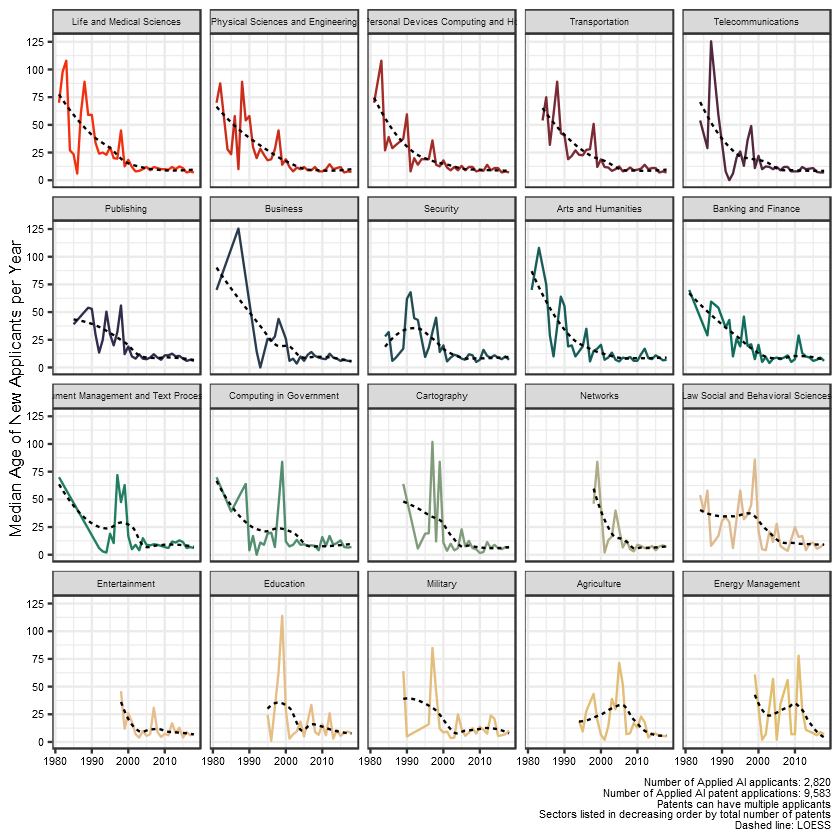

In [81]:
New_Applicant_Age_AS_Trend <- New_Applicant_Age_AS%>%
      mutate(Field = fct_reorder(Field, -Total_Field_Patens)) %>%
      ggplot(aes(x= Year, y=Yearly_Median, color=Field)) +
      geom_line() + 
      stat_smooth(method = "loess", formula = y ~ x, se = FALSE, alpha=0.25, color="black", linetype="dashed", size=0.5) + 
      labs(caption="Number of Applied AI applicants: 2,820\nNumber of Applied AI patent applications: 9,583\nPatents can have multiple applicants\nSectors listed in decreasing order by total number of patents\nDashed line: LOESS") + 
      theme_bw() +
      theme(legend.position="none",legend.title=element_blank(),legend.text = element_text(size=7),
            legend.key = element_rect(size = 1)) + 
      scale_color_manual(values=rev(wes_palette(n=20, name="Rushmore", type = "continuous"))) + 
      scale_x_continuous(name= NULL, limits = c(1981,2018)) +
      scale_y_continuous(name="Median Age of New Applicants per Year", limits= c(0,126), breaks=seq(0,125,25)) + 
      theme(plot.caption=element_text(family="sans",size=6)) + 
      theme(axis.text.x = element_text(family="sans",size=6, color="black")) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(axis.text.y = element_text(family="sans",size=6, color="black")) +
      facet_wrap(. ~Field) + 
      theme(strip.text.x = element_text(size = 5))
New_Applicant_Age_AS_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=New_Applicant_Age_AS_Trend,
       filename="New_Applicant_Age_AS_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=5,
       height=(5*0.75),
       units=c("in"),
       dpi=300) 


# 4) Industrial Characteristic of Applicants: Size

Select patent applications for which size range is available

# 4.1) Evolution Over time

In [82]:
Size_Analysis_All <- Industrial_Patent_Dataset[is.na(SIZE_RANGE)==FALSE,]

#Number unique applicants
length(unique(Size_Analysis_All$APPLICANT_MATCH_NAME))

#Number unique patent applications
length(unique(Size_Analysis_All$Patent_number))

#Number entries
nrow(Size_Analysis_All)

[1] 2862

[1] 10037

[1] 10442

Distribution of patent applications

In [83]:
round(prop.table(table(Size_Analysis_All[GPT_Scope=="Applied_AI",SIZE_RANGE])),3)
round(prop.table(table(Size_Analysis_All[GPT_Scope=="Core_AI",SIZE_RANGE])),3)


    >10000       1-10  1001-5000      11-50    201-500 5001-10000  501-1,000 
     0.284      0.239      0.069      0.148      0.044      0.039      0.043 
    51-200 
     0.133 


    >10000       1-10  1001-5000      11-50    201-500 5001-10000  501-1,000 
     0.337      0.179      0.083      0.149      0.034      0.051      0.070 
    51-200 
     0.096 

Count number of patents applications per size cluster per year

In [84]:
Size_Analysis_All <- Size_Analysis_All[, .N, by=c("Year", "SIZE_RANGE", "GPT_Scope")]
colnames(Size_Analysis_All)[4] <- "Patent_per_Size"

#Consistency Check
sum(Size_Analysis_All$Patent_per_Size)

head(Size_Analysis_All)


[1] 10442

Year,SIZE_RANGE,GPT_Scope,Patent_per_Size
2017,11-50,Applied_AI,277
2017,51-200,Applied_AI,238
2018,51-200,Applied_AI,265
2007,11-50,Applied_AI,21
2018,1-10,Applied_AI,576
2016,11-50,Applied_AI,168


Summarize applications by year to calculate share of size cluster on a yearly basis

In [85]:
Size_Analysis_Year <- Size_Analysis_All[,keyby=.(Year,GPT_Scope),
                                        .(Total_Year=sum(Patent_per_Size))]

#Consistency check
sum(Size_Analysis_Year$Total_Year)

head(Size_Analysis_Year)
tail(Size_Analysis_Year)

[1] 10442

Year,GPT_Scope,Total_Year
1981,Applied_AI,1
1982,Applied_AI,4
1983,Applied_AI,2
1984,Applied_AI,8
1985,Applied_AI,6
1986,Applied_AI,6


Year,GPT_Scope,Total_Year
2016,Applied_AI,1166
2016,Core_AI,86
2017,Applied_AI,1781
2017,Core_AI,85
2018,Applied_AI,1956
2018,Core_AI,77


Combine 'Size_Analysis_All' and 'Size_Analysis_Year'

In [86]:
setkey(Size_Analysis_All,Year,GPT_Scope)
setkey(Size_Analysis_Year,Year,GPT_Scope)

Size_Analysis_All <- Size_Analysis_Year[Size_Analysis_All]
head(Size_Analysis_All)

Year,GPT_Scope,Total_Year,SIZE_RANGE,Patent_per_Size
1981,Applied_AI,1,>10000,1
1982,Applied_AI,4,5001-10000,2
1982,Applied_AI,4,>10000,1
1982,Applied_AI,4,51-200,1
1983,Applied_AI,2,>10000,1
1983,Applied_AI,2,"501-1,000",1


Calculate the share of Patent_per_Size of Total_Year

In [87]:
Size_Analysis_All <- Size_Analysis_All[, Patent_per_Size_Rate:= Patent_per_Size/Total_Year]
head(Size_Analysis_All)

Year,GPT_Scope,Total_Year,SIZE_RANGE,Patent_per_Size,Patent_per_Size_Rate
1981,Applied_AI,1,>10000,1,1.00
1982,Applied_AI,4,5001-10000,2,0.50
1982,Applied_AI,4,>10000,1,0.25
1982,Applied_AI,4,51-200,1,0.25
1983,Applied_AI,2,>10000,1,0.50
1983,Applied_AI,2,"501-1,000",1,0.50


In [88]:
Size_Analysis_All$SIZE_RANGE <- factor(Size_Analysis_All$SIZE_RANGE, 
                                       levels = c(">10000","5001-10000", "1001-5000","501-1,000",
                                                       "201-500","51-200", "11-50","1-10"))
setorder(Size_Analysis_All,Year, SIZE_RANGE)
head(Size_Analysis_All)
sapply(Size_Analysis_All,class)

Year,GPT_Scope,Total_Year,SIZE_RANGE,Patent_per_Size,Patent_per_Size_Rate
1981,Applied_AI,1,>10000,1,1.00
1982,Applied_AI,4,>10000,1,0.25
1982,Applied_AI,4,5001-10000,2,0.50
1982,Applied_AI,4,51-200,1,0.25
1983,Applied_AI,2,>10000,1,0.50
1983,Applied_AI,2,"501-1,000",1,0.50


Year            GPT_Scope           Total_Year 
           "integer"          "character"            "integer" 
          SIZE_RANGE      Patent_per_Size Patent_per_Size_Rate 
            "factor"            "integer"            "numeric"

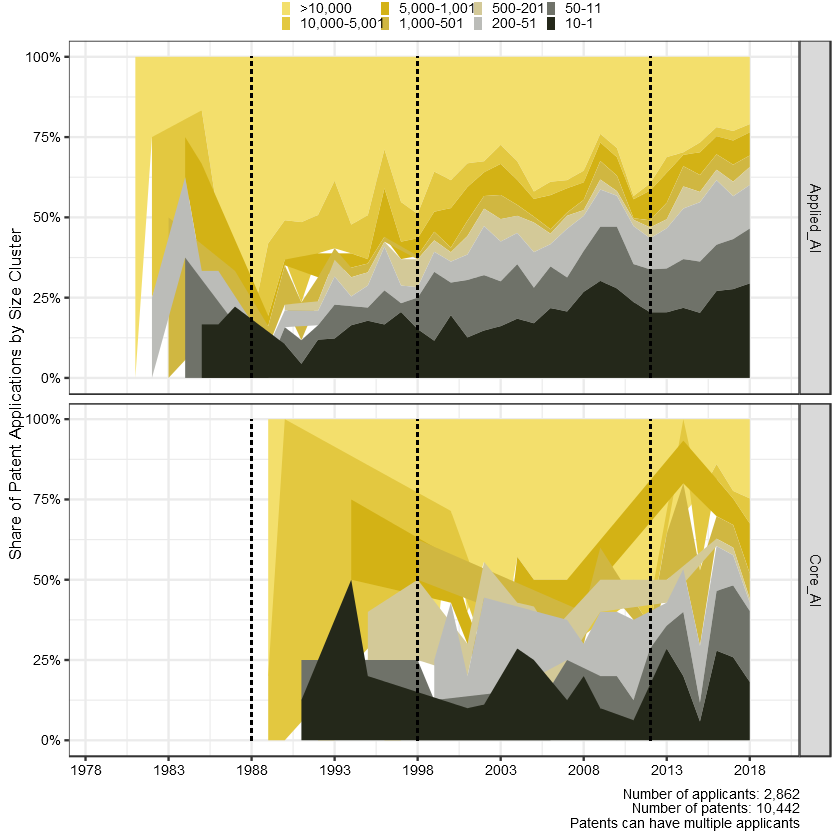

In [89]:
Size_Analysis_All_Trend <- ggplot(Size_Analysis_All, aes(x=Year, y=Patent_per_Size_Rate, fill=SIZE_RANGE)) +
      geom_area(alpha=1) +
      geom_segment(aes(x = 1988, y = 0, xend = 1988, yend =1), linetype="dashed", color="black", size=0.5) +
      geom_segment(aes(x = 1998, y = 0, xend = 1998, yend =1), linetype="dashed", color="black", size=0.5) +
      geom_segment(aes(x = 2012, y = 0, xend = 2012, yend =1), linetype="dashed", color="black", size=0.5) +
      labs(caption="Number of applicants: 2,862\nNumber of patents: 10,442\n Patents can have multiple applicants") + 
      theme_bw() +
      theme(legend.position="top",legend.title=element_blank(),legend.text = element_text(size=8),
            legend.key = element_rect(size = 1), legend.margin=margin(0,0,0,0),legend.key.size=unit(0.2,"cm"),
            legend.box.margin=margin(-5,-5,-5,-5)) + 
      scale_fill_manual(values=wes_palette(n=8, name="Moonrise1", type = "continuous"),
                        labels=c(">10,000","10,000-5,001", "5,000-1,001","1,000-501","500-201","200-51",
                                   "50-11","10-1")) +
      scale_x_continuous(name= NULL, limits = c(1979,2019),breaks=seq(1978,2018,5)) +
      scale_y_continuous(name="Share of Patent Applications by Size Cluster",labels = percent_format()) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.y=element_text(size=10))+
      facet_grid(GPT_Scope~.)
Size_Analysis_All_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Size_Analysis_All_Trend,
       filename="Size_Analysis_All_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=5,
       height=(5*0.75),
       units=c("in"),
       dpi=300)

### *Robustnesss Check: Size Share Development Direct Match

In [90]:
Size_Analysis_All_DirectM <- Industrial_Patent_Dataset[is.na(SIZE_RANGE)==FALSE & METHOD=="Direct_Match",]
nrow(Size_Analysis_All_DirectM)
length(unique(Size_Analysis_All_DirectM$APPLICANT_MATCH_NAME))

Size_Analysis_All_DirectM <- Size_Analysis_All_DirectM[, .N, by=c("Year", "SIZE_RANGE","GPT_Scope")]
colnames(Size_Analysis_All_DirectM)[4] <- "Patent_per_Size"

Size_Analysis_Year_DirectM <- Size_Analysis_All_DirectM[,keyby=.(Year,GPT_Scope), .(Total_Year=sum(Patent_per_Size))]

setkey(Size_Analysis_All_DirectM, Year, GPT_Scope)
setkey(Size_Analysis_Year_DirectM, Year, GPT_Scope)
Size_Analysis_All_DirectM <- Size_Analysis_Year_DirectM[Size_Analysis_All_DirectM]

Size_Analysis_All_DirectM <- Size_Analysis_All_DirectM[, Patent_per_Size_Rate:= Patent_per_Size/Total_Year]
Size_Analysis_All_DirectM$SIZE_RANGE <- factor(Size_Analysis_All_DirectM$SIZE_RANGE, 
                                       levels = c(">10000","5001-10000", "1001-5000","501-1,000",
                                                       "201-500","51-200", "11-50","1-10"))
setorder(Size_Analysis_All_DirectM,Year, SIZE_RANGE)

[1] 6232

[1] 1508

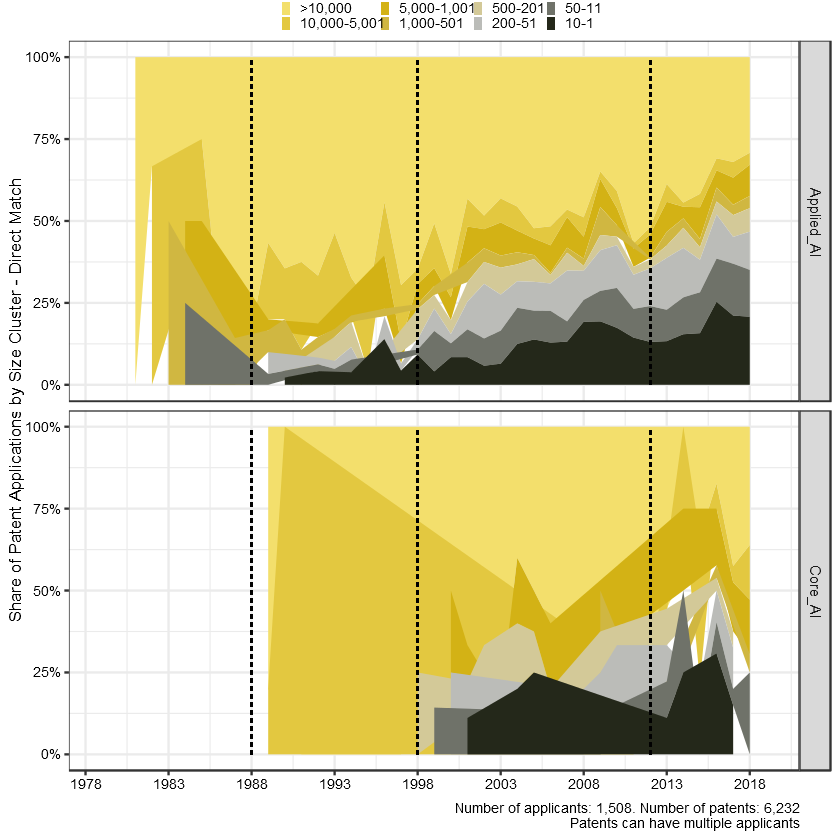

In [91]:
Size_Analysis_All_DirectM_Trend <- ggplot(Size_Analysis_All_DirectM, aes(x=Year, y=Patent_per_Size_Rate, fill=SIZE_RANGE)) +
      geom_area(alpha=1) +
      geom_segment(aes(x = 1988, y = 0, xend = 1988, yend =1), linetype="dashed", color="black", size=0.5) +
      geom_segment(aes(x = 1998, y = 0, xend = 1998, yend =1), linetype="dashed", color="black", size=0.5) +
      geom_segment(aes(x = 2012, y = 0, xend = 2012, yend =1), linetype="dashed", color="black", size=0.5) +
      labs(caption="Number of applicants: 1,508. Number of patents: 6,232\n Patents can have multiple applicants") + 
      theme_bw() +
      theme(legend.position="top",legend.title=element_blank(),legend.text = element_text(size=8),
            legend.key = element_rect(size = 1), legend.margin=margin(0,0,0,0),legend.key.size=unit(0.2,"cm"),
            legend.box.margin=margin(-5,-5,-5,-5)) + 
      scale_fill_manual(values=wes_palette(n=8, name="Moonrise1", type = "continuous"),
                        labels=c(">10,000","10,000-5,001", "5,000-1,001","1,000-501","500-201","200-51",
                                   "50-11","10-1")) +
      scale_x_continuous(name= NULL, limits = c(1979,2019),breaks=seq(1978,2018,5)) +
      scale_y_continuous(name="Share of Patent Applications by Size Cluster - Direct Match",labels = percent_format()) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) + 
      theme(axis.title.y=element_text(size=10))+
      facet_grid(GPT_Scope~.)
Size_Analysis_All_DirectM_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Size_Analysis_All_DirectM_Trend,
       filename="Size_Analysis_All_DirectM_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=7.25,
       height=(7.25*0.75),
       units=c("in"),
       dpi=300)

## 4.2) Distribution of Size across Application Sectors

Select Applied AI patent applications for which the size range is available

In [92]:
Size_Analysis_AS <- Industrial_Patent_Dataset[is.na(SIZE_RANGE)==FALSE & GPT_Scope=="Applied_AI",]

#Number unique Applicants
length(unique(Size_Analysis_AS$APPLICANT_MATCH_NAME)) 

#Number unique Patent Applications
length(unique(Size_Analysis_AS$Patent_number))

#Number Entries
nrow(Size_Analysis_AS)

head(Size_Analysis_AS)

[1] 2820

[1] 9583

[1] 9973

Patent_number,Application_Date,Clean_name,APPLICANT_MATCH_NAME,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
WO2018026431,2017-05-30,12 SIGMA TECH,12 SIGMA,12 SIGMA TECHNOLOGIES,12 SIGMA TECHNOLOGIES,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2017179011,2017-04-13,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,1,0,0,1,1,1,1,1,1
WO2019104443,2018-11-30,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2008060643,2007-03-21,21ST CENTURY TECH INC,21ST CENTURY,21ST SENSORY,21ST SENSORY,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,1,1,1,1,1
WO2019028261,2018-08-02,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2019104180,2018-11-21,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1


Transform Table for graph

In [93]:
cols_selection2 <- c("Patent_number", "Year", "SIZE_RANGE", as.vector(Field_Applications))
Size_Analysis_AS <- Size_Analysis_AS[, ..cols_selection2]
head(Size_Analysis_AS)

Patent_number,Year,SIZE_RANGE,Agriculture,Arts and Humanities,Banking and Finance,Business,Cartography,Computing in Government,Document Management and Text Processing,...,Law Social and Behavioral Sciences,Life and Medical Sciences,Military,Networks,Personal Devices Computing and Hc,Physical Sciences and Engineering,Publishing,Security,Telecommunications,Transportation
WO2018026431,2017,11-50,0,1,0,1,0,0,1,...,0,1,0,0,1,1,1,0,1,1
WO2017179011,2017,51-200,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,1
WO2019104443,2018,51-200,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,1
WO2008060643,2007,11-50,0,0,0,0,0,1,0,...,0,1,1,1,1,1,0,0,1,1
WO2019028261,2018,1-10,0,0,1,1,0,0,0,...,0,1,0,0,1,1,1,0,1,1
WO2019104180,2018,1-10,0,0,1,0,0,0,0,...,1,1,0,0,1,1,1,0,1,1


In [94]:
Size_Analysis_AS <- melt(Size_Analysis_AS,
                         id.vars=c("Year", "Patent_number","SIZE_RANGE"),
                         measure.vars = as.character(Field_Applications),
                         variable.name = "Field",
                         value.name = "Dummy")

head(Size_Analysis_AS)

Year,Patent_number,SIZE_RANGE,Field,Dummy
2017,WO2018026431,11-50,Agriculture,0
2017,WO2017179011,51-200,Agriculture,0
2018,WO2019104443,51-200,Agriculture,0
2007,WO2008060643,11-50,Agriculture,0
2018,WO2019028261,1-10,Agriculture,0
2018,WO2019104180,1-10,Agriculture,0


In [95]:
Size_Analysis_AS <- Size_Analysis_AS[Dummy==1,]
head(Size_Analysis_AS)

Year,Patent_number,SIZE_RANGE,Field,Dummy
2017,WO2017131975,51-200,Agriculture,1
2012,WO2013059938,11-50,Agriculture,1
2012,WO2012155192,11-50,Agriculture,1
2001,EP2631856,11-50,Agriculture,1
2005,WO2005116896,11-50,Agriculture,1
1994,EP0615682,11-50,Agriculture,1


Count number applications per Field per Year per Size Range

In [96]:
Size_Analysis_AS <- Size_Analysis_AS[, keyby=.(Year,Field, SIZE_RANGE),
                                     .(Total_Size_Range=sum(Dummy))]

#Consistency Check
sum(Size_Analysis_AS$Total_Size_Range)

head(Size_Analysis_AS)

[1] 66155

Year,Field,SIZE_RANGE,Total_Size_Range
1981,Arts and Humanities,>10000,1
1981,Banking and Finance,>10000,1
1981,Business,>10000,1
1981,Computing in Government,>10000,1
1981,Document Management and Text Processing,>10000,1
1981,Life and Medical Sciences,>10000,1


Count number applications per Field per Year

In [97]:
Size_Analysis_AS_Year <- Size_Analysis_AS[, by=.(Year,Field), .(Total_Year=sum(Total_Size_Range))]

#Consistency Check
sum(Size_Analysis_AS_Year$Total_Year)

head(Size_Analysis_AS_Year)

[1] 66155

Year,Field,Total_Year
1981,Arts and Humanities,1
1981,Banking and Finance,1
1981,Business,1
1981,Computing in Government,1
1981,Document Management and Text Processing,1
1981,Life and Medical Sciences,1


Count number applications per Field

In [98]:
Size_Analysis_AS_Field <- Size_Analysis_AS_Year[, by=Field,
                                     .(Total_Field=sum(Total_Year))]
#Consistency Check
sum(Size_Analysis_AS_Field$Total_Field)

head(Size_Analysis_AS_Field)

[1] 66155

Field,Total_Field
Arts and Humanities,3460
Banking and Finance,2177
Business,3261
Computing in Government,1834
Document Management and Text Processing,2611
Life and Medical Sciences,8519


Combine 'Size_Analysis_AS_Field' and 'Size_Analysis_AS_Year'

In [99]:
Size_Analysis_AS_Year <- Size_Analysis_AS_Field[Size_Analysis_AS_Year, on="Field"]

head(Size_Analysis_AS_Year)

Field,Total_Field,Year,Total_Year
Arts and Humanities,3460,1981,1
Banking and Finance,2177,1981,1
Business,3261,1981,1
Computing in Government,1834,1981,1
Document Management and Text Processing,2611,1981,1
Life and Medical Sciences,8519,1981,1


Combine 'Size_Analysis_AS' and 'Size_Analysis_AS_Year'

In [100]:
setkey(Size_Analysis_AS, Year, Field)
setkey(Size_Analysis_AS_Year, Year, Field)
Size_Analysis_AS <- Size_Analysis_AS_Year[Size_Analysis_AS]

head(Size_Analysis_AS)

Field,Total_Field,Year,Total_Year,SIZE_RANGE,Total_Size_Range
Arts and Humanities,3460,1981,1,>10000,1
Banking and Finance,2177,1981,1,>10000,1
Business,3261,1981,1,>10000,1
Computing in Government,1834,1981,1,>10000,1
Document Management and Text Processing,2611,1981,1,>10000,1
Life and Medical Sciences,8519,1981,1,>10000,1


Calculate the Share of Size Range by Year 

In [101]:
Size_Analysis_AS<- Size_Analysis_AS[, Size_Share:= Total_Size_Range/Total_Year]

tail(Size_Analysis_AS)

Field,Total_Field,Year,Total_Year,SIZE_RANGE,Total_Size_Range,Size_Share
Transportation,8095,2018,1741,11-50,300,0.17231476
Transportation,8095,2018,1741,201-500,98,0.05628949
Transportation,8095,2018,1741,5001-10000,42,0.02412407
Transportation,8095,2018,1741,"501-1,000",67,0.03848363
Transportation,8095,2018,1741,51-200,245,0.14072372
Transportation,8095,2018,1741,>10000,362,0.20792648


In [102]:
Size_Analysis_AS$SIZE_RANGE <- factor(Size_Analysis_AS$SIZE_RANGE,
                                      levels = c(">10000","5001-10000", "1001-5000","501-1,000",
                                                       "201-500","51-200", "11-50","1-10"))

setorder(Size_Analysis_AS,Year, SIZE_RANGE)
sapply(Size_Analysis_AS,class)

Field      Total_Field             Year       Total_Year 
        "factor"        "integer"        "integer"        "integer" 
      SIZE_RANGE Total_Size_Range       Size_Share 
        "factor"        "integer"        "numeric"

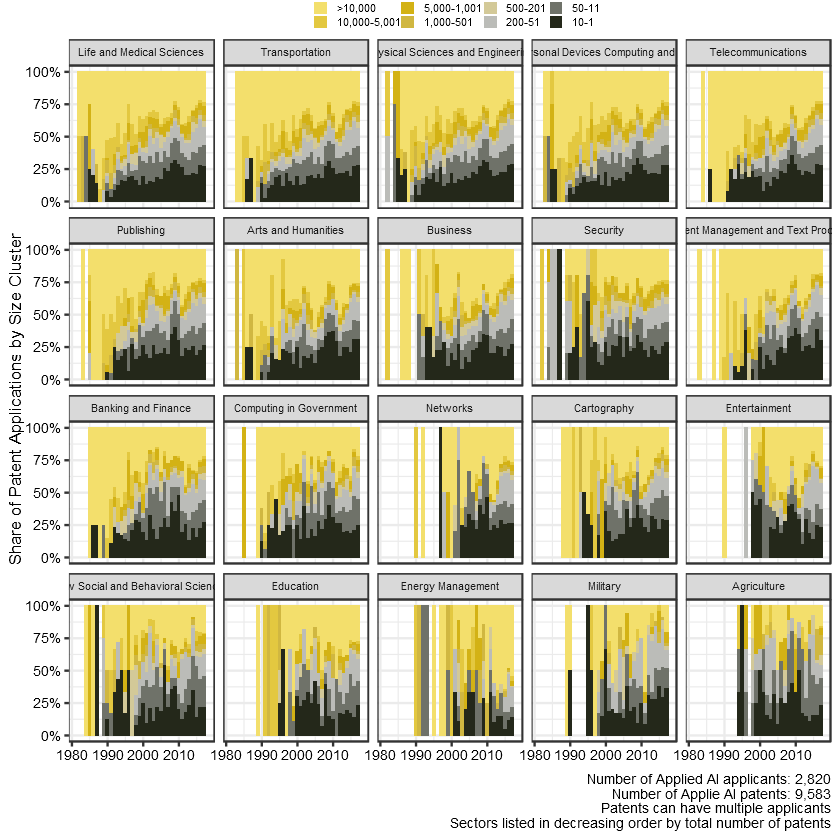

In [103]:
Size_Analysis_AS_Chart <- Size_Analysis_AS %>%
      mutate(Field = fct_reorder(Field,-Total_Field)) %>%
      ggplot(aes(x= Year, y=Size_Share)) +
      geom_bar(aes(fill=SIZE_RANGE), postition="dodge", stat="identity") + 
      labs(caption="Number of Applied AI applicants: 2,820\nNumber of Applie AI patents: 9,583\nPatents can have multiple applicants\nSectors listed in decreasing order by total number of patents") + 
      theme_bw() +
      theme(legend.position="top",legend.title=element_blank(),legend.text = element_text(size=6),
            legend.key = element_rect(size = 0.5),legend.margin=margin(0,0,0,0),legend.key.size=unit("0.3","cm"),
            legend.box.margin=margin(-5,-5,-5,-5) ) +
      scale_fill_manual(values=wes_palette(n=8, name="Moonrise1", type="continuous"),
                          labels=c(">10,000","10,000-5,001", "5,000-1,001","1,000-501","500-201","200-51",
                                   "50-11","10-1")) +
      scale_x_continuous(name= NULL, limits = c(1981,2018)) +
      scale_y_continuous(name="Share of Patent Applications by Size Cluster", labels = percent_format()) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=8, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      facet_wrap(. ~Field) + 
      theme(axis.title.y=element_text(size=10)) + 
      theme(strip.text.x = element_text(size = 6))
Size_Analysis_AS_Chart

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine.
ggsave(plot=Size_Analysis_AS_Chart,
       filename="Size_Analysis_AS_Chart.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=7.25,
       height=(7.25*0.75),
       units=c("in"),
       dpi=300)

### 3.3.3) Share of Application of Copanies with >5000 Employees

Select Applied AI patent applications for which the size range is available

In [104]:
Large_Applicants <- Industrial_Patent_Dataset[is.na(SIZE_RANGE)==FALSE & GPT_Scope=="Applied_AI",] 
head(Large_Applicants)

Patent_number,Application_Date,Clean_name,APPLICANT_MATCH_NAME,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
WO2018026431,2017-05-30,12 SIGMA TECH,12 SIGMA,12 SIGMA TECHNOLOGIES,12 SIGMA TECHNOLOGIES,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2017179011,2017-04-13,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,1,0,0,1,1,1,1,1,1
WO2019104443,2018-11-30,1QB INFORMATION TECH INC,1QB INFORMATION,1QB INFORMATION TECHNOLOGIES (1QBIT),1QB INFORMATION TECHNOLOGIES 1QBIT,Fuzzy_Match,CANADA,CANADA,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2008060643,2007-03-21,21ST CENTURY TECH INC,21ST CENTURY,21ST SENSORY,21ST SENSORY,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,0,0,1,1,1,1,1
WO2019028261,2018-08-02,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1
WO2019104180,2018-11-21,24 7 AI INC,24 7 AI,24 ALARM,24 ALARM,Fuzzy_Match,UNITED STATES,UNITED STATES,Enterprise,...,1,0,0,0,1,1,1,1,1,1


Select application by enterprises with more than 1000 employees

In [105]:
Large_Applicants <- Large_Applicants[SIZE_RANGE==">10000" | SIZE_RANGE=="5001-10000",]

#Number unique Applicants
length(unique(Large_Applicants$APPLICANT_MATCH_NAME)) 

#Number unique Patent Applications
length(unique(Large_Applicants$Patent_number))

#Number Entries
nrow(Large_Applicants)

head(Large_Applicants)

[1] 280

[1] 3162

[1] 3228

Patent_number,Application_Date,Clean_name,APPLICANT_MATCH_NAME,PDL_ORIGINAL_NAME,PDL_MATCH_NAME,METHOD,Person_ctry_code,COUNTRY,Applicant_Type,...,Publishing,Robotics,Search Methods,Security,Speech Processing,Telecommunications,Transportation,Field_Applications,Functional_Applications,Techniques
WO2018194707,2017-10-04,ACI WORLDWIDE CORP,ACI WORLDWIDE,ACI WORLDWIDE,ACI WORLDWIDE,Direct_Match,UNITED STATES,UNITED STATES,Enterprise,...,0,0,0,1,0,1,1,1,1,1
EP2305110,1998-03-17,ADIDAS AG,ADIDAS,ADIDAS,ADIDAS,Direct_Match,GERMANY,GERMANY,Enterprise,...,1,0,0,0,0,1,1,1,1,1
EP3447721,2017-08-24,AGFA NV,AGFA,AGFA HEALTHCARE,AGFA HEALTHCARE,Fuzzy_Match,BELGIUM,BELGIUM,Enterprise,...,0,0,0,0,0,0,1,1,0,1
WO2019038246,2018-08-21,AGFA NV,AGFA,AGFA HEALTHCARE,AGFA HEALTHCARE,Fuzzy_Match,BELGIUM,BELGIUM,Enterprise,...,0,0,0,0,0,0,1,1,0,1
EP1357480,2002-04-17,AGFA GEVAERT,AGFA GEVAERT,AGFA HEALTHCARE,AGFA HEALTHCARE,Fuzzy_Match,BELGIUM,BELGIUM,Enterprise,...,0,0,0,0,0,0,1,1,1,1
EP1696366,2005-02-24,AGFA HEALTHCARE NV,AGFA HEALTHCARE,AGFA HEALTHCARE,AGFA HEALTHCARE,Direct_Match,BELGIUM,BELGIUM,Enterprise,...,0,0,0,0,0,0,1,1,1,1


Transform table for graph

In [106]:
cols_selection3 <- c("Patent_number", "Year", "SIZE_RANGE", as.vector(Field_Applications))
Large_Applicants <- Large_Applicants[, ..cols_selection3]
head(Large_Applicants)

Patent_number,Year,SIZE_RANGE,Agriculture,Arts and Humanities,Banking and Finance,Business,Cartography,Computing in Government,Document Management and Text Processing,...,Law Social and Behavioral Sciences,Life and Medical Sciences,Military,Networks,Personal Devices Computing and Hc,Physical Sciences and Engineering,Publishing,Security,Telecommunications,Transportation
WO2018194707,2017,5001-10000,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,1,1
EP2305110,1998,>10000,0,1,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,1
EP3447721,2017,5001-10000,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
WO2019038246,2018,5001-10000,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
EP1357480,2002,5001-10000,0,0,0,0,0,1,0,...,1,1,0,0,1,1,0,0,0,1
EP1696366,2005,5001-10000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [107]:
Large_Applicants <- melt(Large_Applicants,
                         id.vars=c("Year", "Patent_number","SIZE_RANGE"),
                         measure.vars = as.character(Field_Applications),
                         variable.name = "Field",
                         value.name = "Dummy")

head(Large_Applicants)

Year,Patent_number,SIZE_RANGE,Field,Dummy
2017,WO2018194707,5001-10000,Agriculture,0
1998,EP2305110,>10000,Agriculture,0
2017,EP3447721,5001-10000,Agriculture,0
2018,WO2019038246,5001-10000,Agriculture,0
2002,EP1357480,5001-10000,Agriculture,0
2005,EP1696366,5001-10000,Agriculture,0


In [108]:
Large_Applicants <- Large_Applicants[Dummy==1,]
head(Large_Applicants)

Year,Patent_number,SIZE_RANGE,Field,Dummy
2009,EP2172861,>10000,Agriculture,1
2005,WO2006026047,>10000,Agriculture,1
2005,WO2006026059,>10000,Agriculture,1
2005,WO2006026060,>10000,Agriculture,1
2002,WO2002057989,>10000,Agriculture,1
2018,WO2019081375,>10000,Agriculture,1


Count number applications per Field per Year per Size Range

In [109]:
Large_Applicants <- Large_Applicants[, keyby=.(Year,Field, SIZE_RANGE),
                                     .(Total_Size_Range=sum(Dummy))]

#Consistency Check
sum(Large_Applicants$Total_Size_Range)

head(Large_Applicants)

[1] 20576

Year,Field,SIZE_RANGE,Total_Size_Range
1981,Arts and Humanities,>10000,1
1981,Banking and Finance,>10000,1
1981,Business,>10000,1
1981,Computing in Government,>10000,1
1981,Document Management and Text Processing,>10000,1
1981,Life and Medical Sciences,>10000,1


Count byField by Year

In [110]:
Large_Applicants <- Large_Applicants[, keyby=.(Year, Field),
                                    .(Large_Applicants=sum(Total_Size_Range))]

tail(Large_Applicants)

Year,Field,Large_Applicants
2018,Personal Devices Computing and Hc,342
2018,Physical Sciences and Engineering,364
2018,Publishing,163
2018,Security,177
2018,Telecommunications,324
2018,Transportation,404


Call 'Size_Analysis_AS_Year' Table previously created

In [111]:
head(Size_Analysis_AS_Year)

Field,Total_Field,Year,Total_Year
Arts and Humanities,3460,1981,1
Banking and Finance,2177,1981,1
Business,3261,1981,1
Computing in Government,1834,1981,1
Document Management and Text Processing,2611,1981,1
Life and Medical Sciences,8519,1981,1


Combine 'Size_Analysis_AS_Year' and 'Large_Applicants'

In [112]:
setkey(Large_Applicants, Year, Field)
setkey(Size_Analysis_AS_Year, Year, Field)
Large_Applicants <- Size_Analysis_AS_Year[Large_Applicants]
tail(Large_Applicants)

Field,Total_Field,Year,Total_Year,Large_Applicants
Personal Devices Computing and Hc,7812,2018,1554,342
Physical Sciences and Engineering,7832,2018,1621,364
Publishing,3769,2018,729,163
Security,2994,2018,716,177
Telecommunications,6518,2018,1465,324
Transportation,8095,2018,1741,404


Calculate Share of Large Applicants per year per field

In [113]:
Large_Applicants <- Large_Applicants[, Share_Large:= Large_Applicants/Total_Year]
tail(Large_Applicants)

Field,Total_Field,Year,Total_Year,Large_Applicants,Share_Large
Personal Devices Computing and Hc,7812,2018,1554,342,0.2200772
Physical Sciences and Engineering,7832,2018,1621,364,0.2245527
Publishing,3769,2018,729,163,0.2235940
Security,2994,2018,716,177,0.2472067
Telecommunications,6518,2018,1465,324,0.2211604
Transportation,8095,2018,1741,404,0.2320505


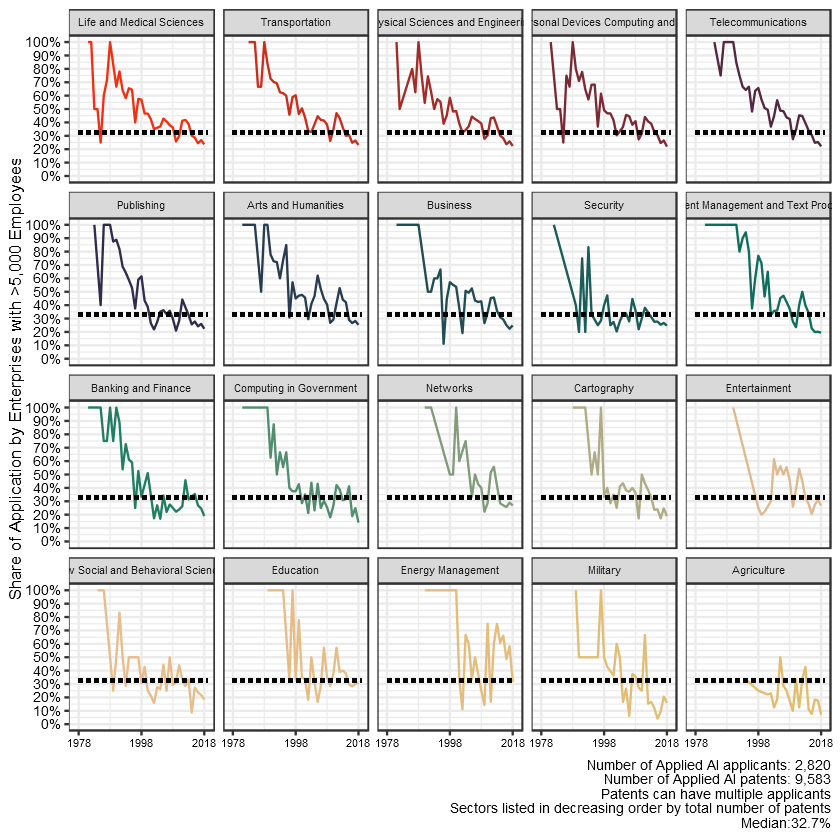

In [114]:
Large_Applicants_Trend <- Large_Applicants %>%
      mutate(Field =fct_reorder(Field,-Total_Field)) %>%
      ggplot(aes(x=Year, y=Share_Large, group = Field, colour = Field)) + 
      labs(caption="Number of Applied AI applicants: 2,820\nNumber of Applied AI patents: 9,583\n Patents can have multiple applicants\nSectors listed in decreasing order by total number of patents\nMedian:32.7%") + 
      geom_line() +
      geom_segment(aes(x=1978, xend=2019, y=0.327, yend=0.327),
                  linetype="dashed", color="black", size=0.75) + 
      theme_bw() + 
      theme(legend.position="none",legend.title=element_blank(),legend.text = element_text(size=6),
            legend.key = element_rect(size = 1)) + 
      guides(col = guide_legend(ncol = 4)) +
      scale_x_continuous(name=NULL, limits=c(1977,2019), breaks=seq(1978,2018, 20)) + 
      scale_y_continuous(name="Share of Application by Enterprises with >5,000 Employees",
                         labels = percent_format(accuracy = 5L), limits=c(0,1), breaks = seq(0,1,0.1)) + 
      scale_color_manual(values=rev(wes_palette(n=20, name="Rushmore", type = "continuous"))) + 
      theme(plot.caption=element_text(family="sans",size=8)) + 
      theme(axis.text.x = element_text(family="sans",size=6, color="black")) + 
      theme(axis.text.y = element_text(family="sans",size=8, color="black")) +
      theme(axis.title.y=element_text(size=10)) +
      theme(strip.text.x = element_text(size = 6)) + 
      facet_wrap(Field~.)
Large_Applicants_Trend

Export graph for Word Document

In [ ]:
#In Jupyter Notebook code gives error but in RSutdio it works fine. 
ggsave(plot=Large_Applicants_Trend,
       filename="Large_Applicants_Trend.png",
       type = "cairo-png",
       path="F:/Thesis/Charts/Final/Research_Question_II",
       scale=1,
       width=7.25,
       height=(7.25*0.75),
       units=c("in"),
       dpi=300)